In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes = True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('/content/drive/MyDrive/Insurance Tech Interview/training data.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,12/16/2016,Friday,Local,1,0.0,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,2/12/2015,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,12/6/2016,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,5/5/2016,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,10/27/2015,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [53]:
df.tail()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
17993,29993,69,M,1.0,93,42338,1,0,Own,15012,3/28/2015,Saturday,Local,0,0.0,99,Broker,0,4806.841803,6.0,Medium,32144.571850,black,16868.53410,0
17994,29996,35,F,0.0,22,35579,1,1,Own,20111,1/5/2015,Monday,Local,1,0.0,94,Phone,1,4089.794471,3.0,Medium,9468.510601,blue,31500.99689,1
17995,29997,27,F,1.0,81,32953,0,1,Rent,15012,9/10/2016,Saturday,Local,2,0.0,1,Online,1,2225.803056,5.0,Medium,64974.369590,black,44536.25506,0
17996,29999,52,F,1.0,86,39519,1,0,Own,15026,12/25/2015,Friday,Highway,1,1.0,75,Broker,1,9560.744844,3.0,Compact,24983.268110,white,50093.75959,0
17997,30000,61,F,0.0,60,41126,1,0,Rent,50001,9/26/2016,Monday,Parking Lot,1,1.0,35,Phone,0,5166.915270,5.0,Medium,19295.970480,blue,15257.21450,0


# **Data Preprocessing**

In [54]:
# Understanding the Data.

def column_summary(df):
    # Return a new DataFrame with summarized information about the columns of 'df'.
    return pd.DataFrame({
        'Data Type': df.dtypes,  # Retrieve the data type of each column (e.g., int64, object).
        'Missing Values': df.isnull().sum(),  # Count the number of missing
        'Unique Values': df.nunique(),  # Count the number of unique values in each column.
        'Memory Usage (bytes)': df.memory_usage(index=False)  # Calculate memory usage for each column (excluding the index).
    })

# print the resulting DataFrame.""
print(column_summary(df))


                        Data Type  Missing Values  Unique Values  \
claim_number                int64               0          17998   
age_of_driver               int64               0             87   
gender                     object               0              2   
marital_status            float64               5              2   
safty_rating                int64               0            100   
annual_income               int64               0           2693   
high_education_ind          int64               0              2   
address_change_ind          int64               0              2   
living_status              object               0              2   
zip_code                    int64               0            276   
claim_date                 object               0            731   
claim_day_of_week          object               0              7   
accident_site              object               0              3   
past_num_of_claims          int64               

In [55]:
df.shape

(17998, 25)

We're dropping claim _number and zip_code columns because they do not hold importance in our analysis


In [56]:
# Data Preprocessing
# Remove identifier column
df.drop(columns = ['claim_number', 'zip_code'], inplace= True)
df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,1.0,85,38301,1,1,Rent,12/16/2016,Friday,Local,1,0.0,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,21,F,0.0,75,30445,0,1,Rent,2/12/2015,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,49,F,0.0,87,38923,0,1,Own,12/6/2016,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,58,F,1.0,58,40605,1,0,Own,5/5/2016,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,38,M,1.0,95,36380,1,0,Rent,10/27/2015,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [57]:
# Check the number of unique value from all of the object datatype.
df.select_dtypes(include = 'object').nunique()

,0
gender,2
living_status,2
claim_date,731
claim_day_of_week,7
accident_site,3
channel,3
vehicle_category,3
vehicle_color,7


In [58]:
# Only extract the year on claim_date column
df['claim_date'] = df['claim_date'].str[-4:].astype(int)
df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,1.0,85,38301,1,1,Rent,2016,Friday,Local,1,0.0,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,21,F,0.0,75,30445,0,1,Rent,2015,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,49,F,0.0,87,38923,0,1,Own,2016,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,58,F,1.0,58,40605,1,0,Own,2016,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,38,M,1.0,95,36380,1,0,Rent,2015,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [59]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

,0
gender,2
living_status,2
claim_day_of_week,7
accident_site,3
channel,3
vehicle_category,3
vehicle_color,7


lets make the Fraud Column Calculatable and responsive by turning it into 1s and 0s


In [60]:
# Replace 1 with 'yes' and 0 with 'no' in the 'fraud' column and other categorical column

df['fraud'] = df['fraud'].replace({0: 'no', 1: 'yes'})
df['high_education_ind'] = df['high_education_ind'].replace({0: 'no', 1: 'yes'})
df['marital_status'] = df['marital_status'].replace({0: 'no', 1: 'yes'})
df['address_change_ind'] = df['address_change_ind'].replace({0: 'no', 1: 'yes'})
df['policy_report_filed_ind'] = df['policy_report_filed_ind'].replace({0: 'no', 1: 'yes'})
df['witness_present_ind'] = df['witness_present_ind'].replace({0: 'no', 1: 'yes'})
df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,yes,85,38301,yes,yes,Rent,2016,Friday,Local,1,no,74,Broker,no,7530.940993,9.0,Compact,12885.45235,white,16161.33381,no
1,21,F,no,75,30445,no,yes,Rent,2015,Thursday,Highway,1,yes,79,Online,no,2966.024895,4.0,Large,29429.45218,white,28691.96422,no
2,49,F,no,87,38923,no,yes,Own,2016,Tuesday,Local,0,no,0,Broker,no,6283.888333,3.0,Compact,21701.18195,white,22090.94758,yes
3,58,F,yes,58,40605,yes,no,Own,2016,Thursday,Local,3,no,99,Broker,yes,6169.747994,4.0,Medium,13198.27344,other,38329.58106,yes
4,38,M,yes,95,36380,yes,no,Rent,2015,Tuesday,Highway,0,yes,7,Broker,no,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,no


# **Exploratory Data Analysis**


 Fraud case distribution:
 fraud
no     15182
yes     2816
Name: count, dtype: int64


/tmp/ipython-input-61-1450524439.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




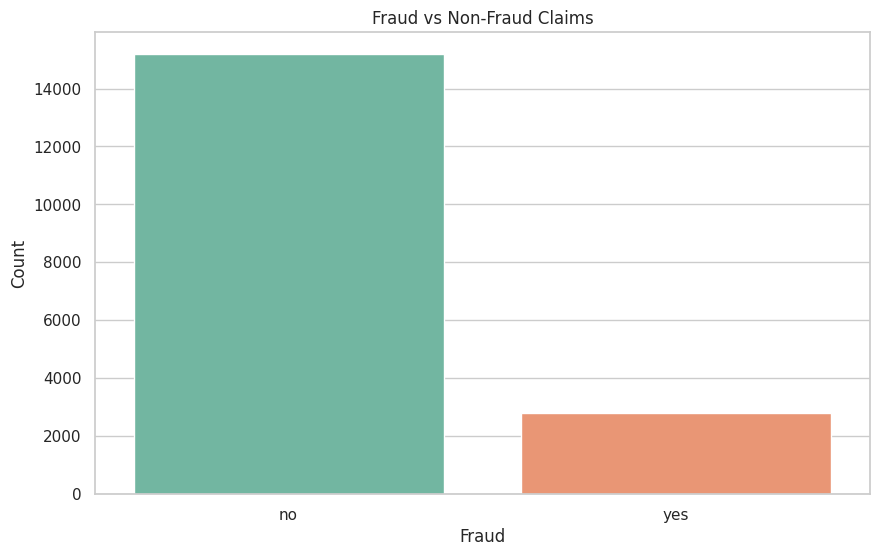


 age_of_driver breakdown:
age_of_driver
44     638
41     632
40     632
42     609
43     605
      ... 
97       1
98       1
90       1
93       1
113      1
Name: count, Length: 87, dtype: int64


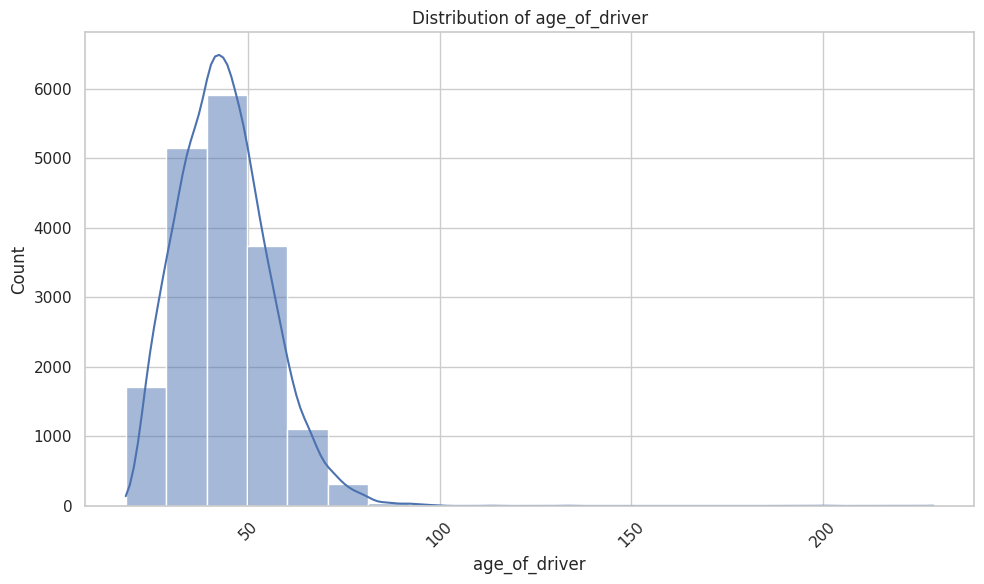


 gender breakdown:
gender
M    9414
F    8584
Name: count, dtype: int64


/tmp/ipython-input-61-1450524439.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




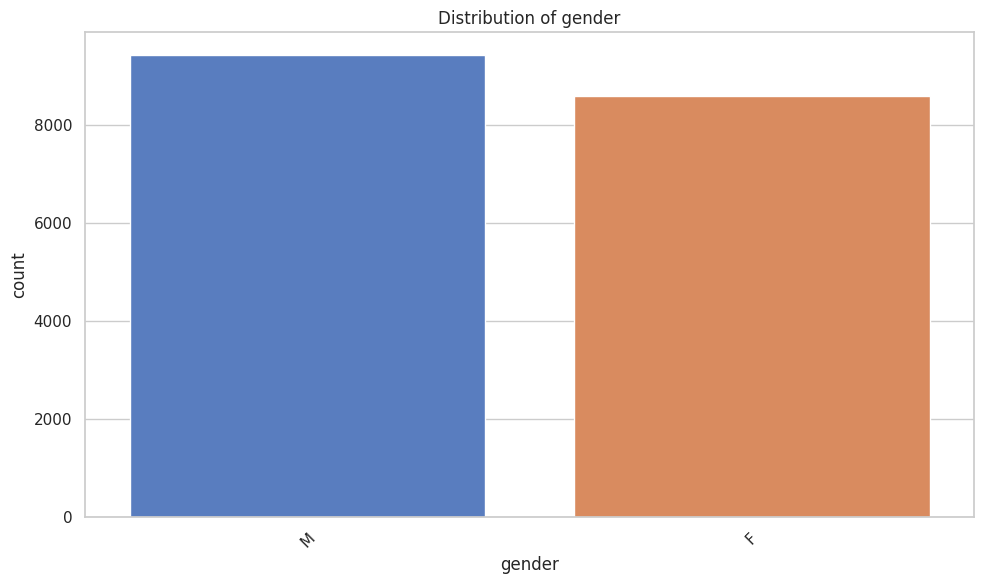


 marital_status breakdown:
marital_status
yes    12824
no      5169
NaN        5
Name: count, dtype: int64


/tmp/ipython-input-61-1450524439.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




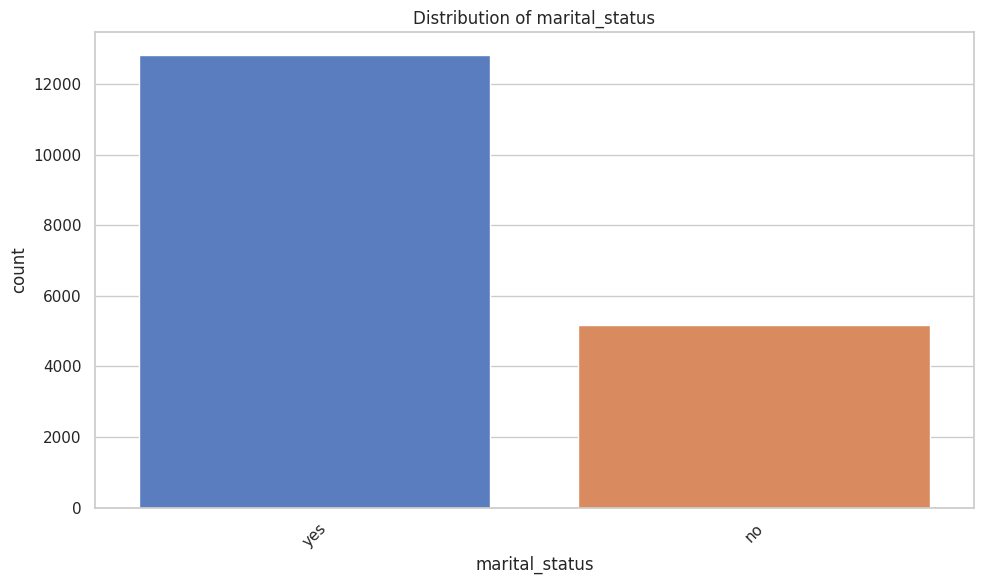


 high_education_ind breakdown:
high_education_ind
yes    12584
no      5414
Name: count, dtype: int64


/tmp/ipython-input-61-1450524439.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




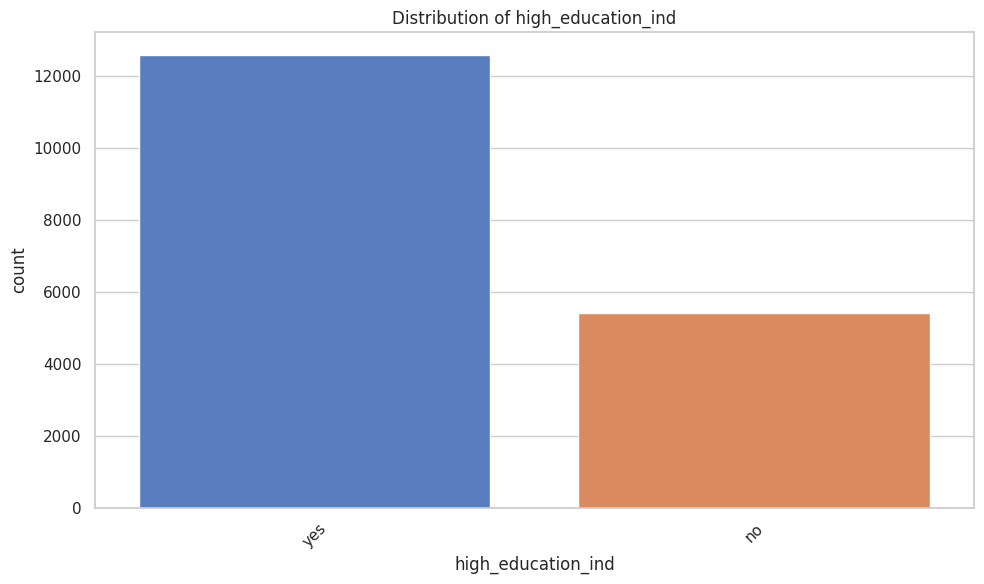


 annual_income breakdown:
annual_income
36371    35
37609    33
37844    33
38501    33
37612    33
         ..
29420     1
33694     1
44439     1
33297     1
45433     1
Name: count, Length: 2693, dtype: int64


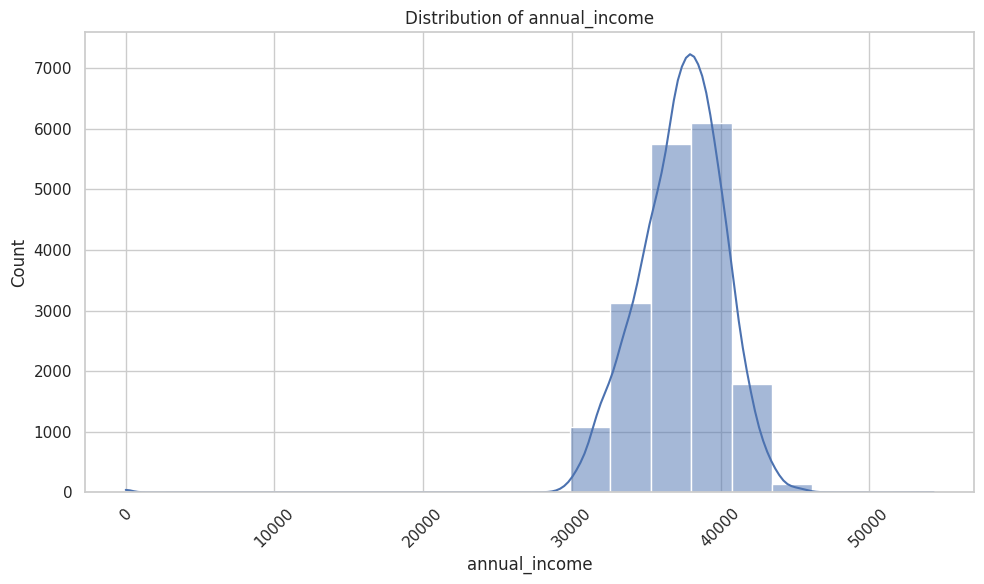


 living_status breakdown:
living_status
Own     9969
Rent    8029
Name: count, dtype: int64


/tmp/ipython-input-61-1450524439.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




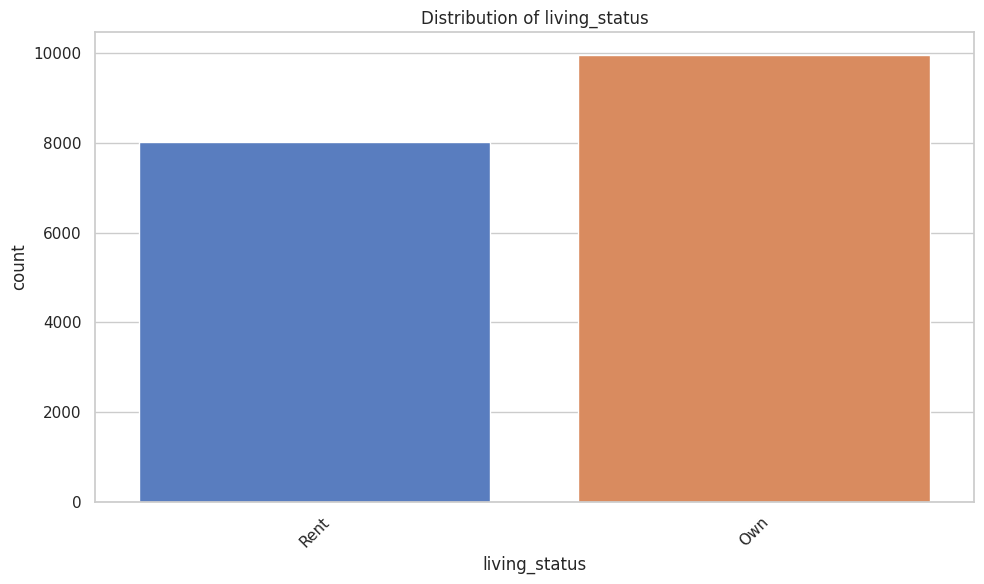


 Claim channel distribution:
channel
Broker    9633
Phone     5771
Online    2594
Name: count, dtype: int64


/tmp/ipython-input-61-1450524439.py:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




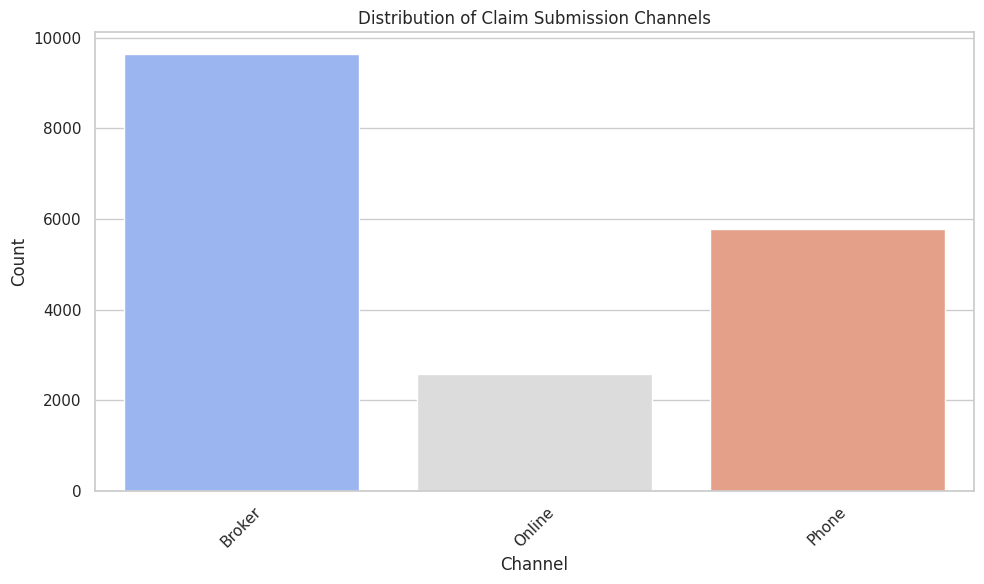

In [61]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# === Load your dataset ===
# df = pd.read_csv("your_dataset.csv")  # Replace with actual path if not loaded yet

# === Distribution of fraud vs non-fraud cases ===
if 'fraud' in df.columns:
    fraud_counts = df['fraud'].value_counts()
    print("\n Fraud case distribution:\n", fraud_counts)

    sns.countplot(data=df, x='fraud', palette='Set2')
    plt.title("Fraud vs Non-Fraud Claims")
    plt.xlabel("Fraud")
    plt.ylabel("Count")
    plt.show()
else:
    print(" 'fraud' column not found.")

# === Breakdown of client demographics ===
demographic_columns = [
    'age_of_driver', 'gender', 'marital_status', 'high_education_ind',
    'annual_income', 'living_status'
]

for col in demographic_columns:
    if col in df.columns:
        print(f"\n {col} breakdown:")
        print(df[col].value_counts(dropna=False))

        if df[col].nunique() <= 10:
            sns.countplot(data=df, x=col, palette='muted')
        else:
            sns.histplot(data=df, x=col, bins=20, kde=True)

        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f" Column '{col}' not found.")

# === Distribution of claim channels ===
if 'channel' in df.columns:
    print("\n Claim channel distribution:")
    print(df['channel'].value_counts())

    sns.countplot(data=df, x='channel', palette='coolwarm')
    plt.title("Distribution of Claim Submission Channels")
    plt.xlabel("Channel")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(" 'channel' column not found.")


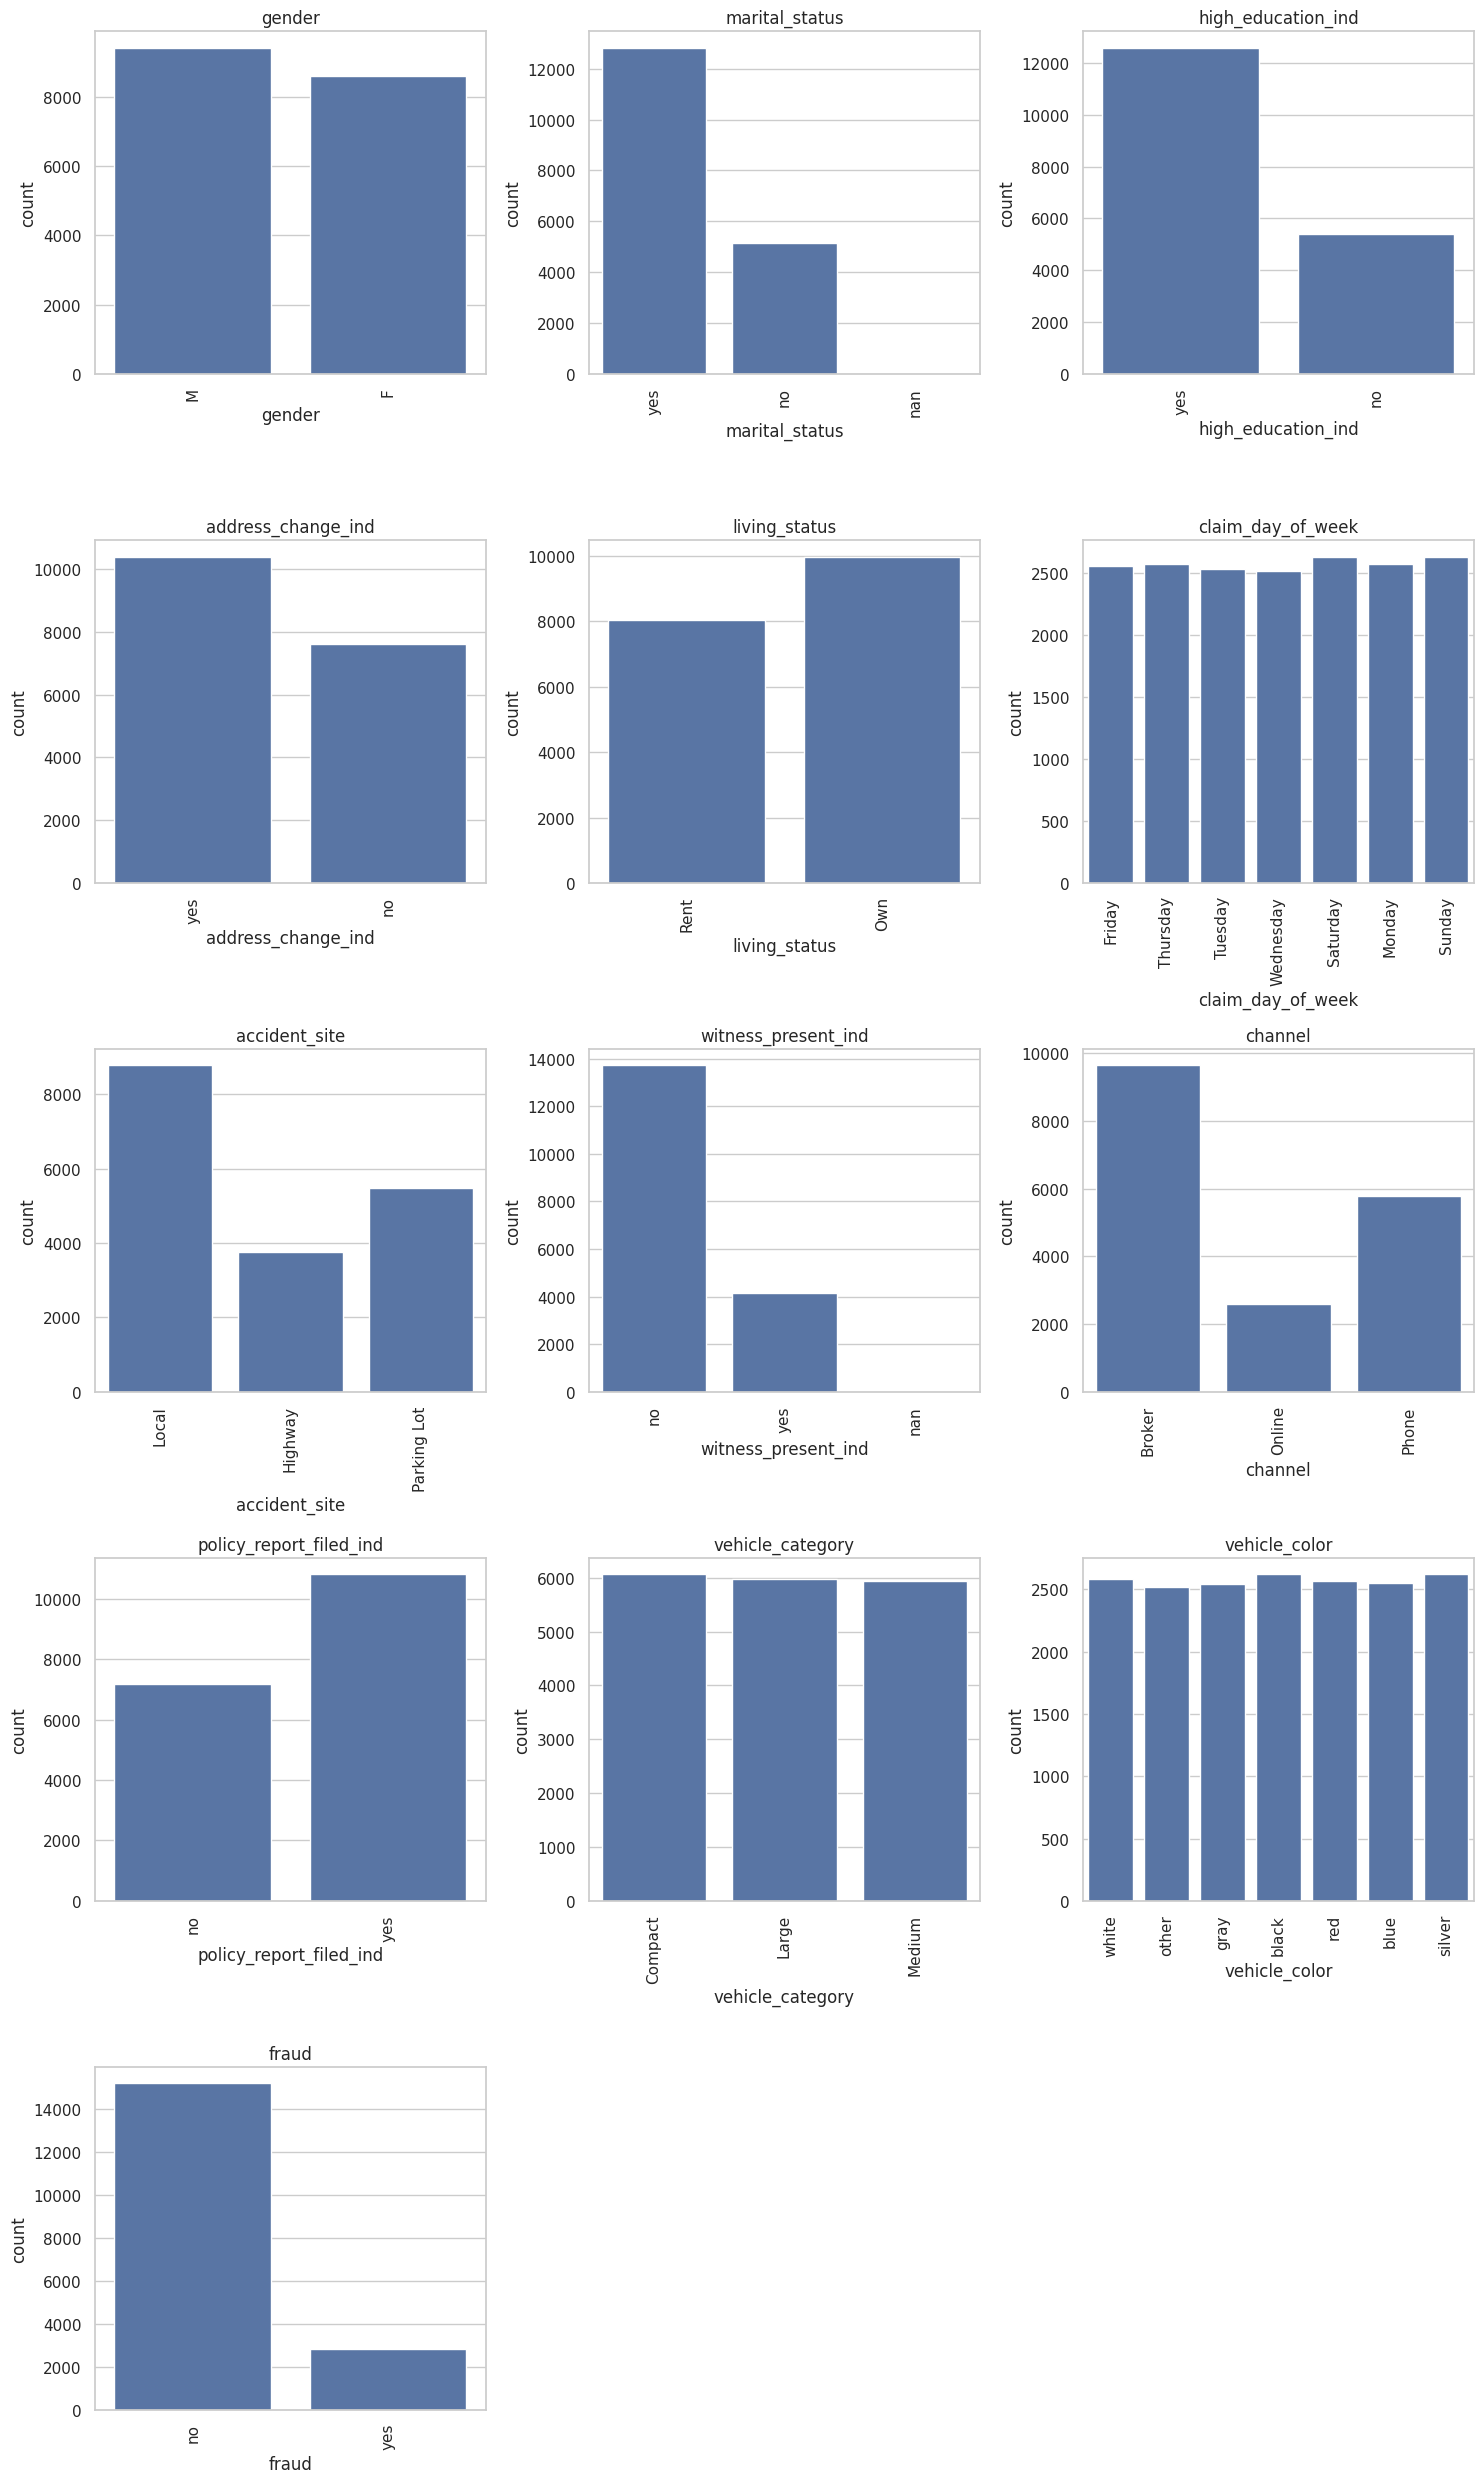

In [62]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    unique_values = df[var].unique()
    sns.countplot(x=var, data=df, ax=axs[i], order=unique_values)
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

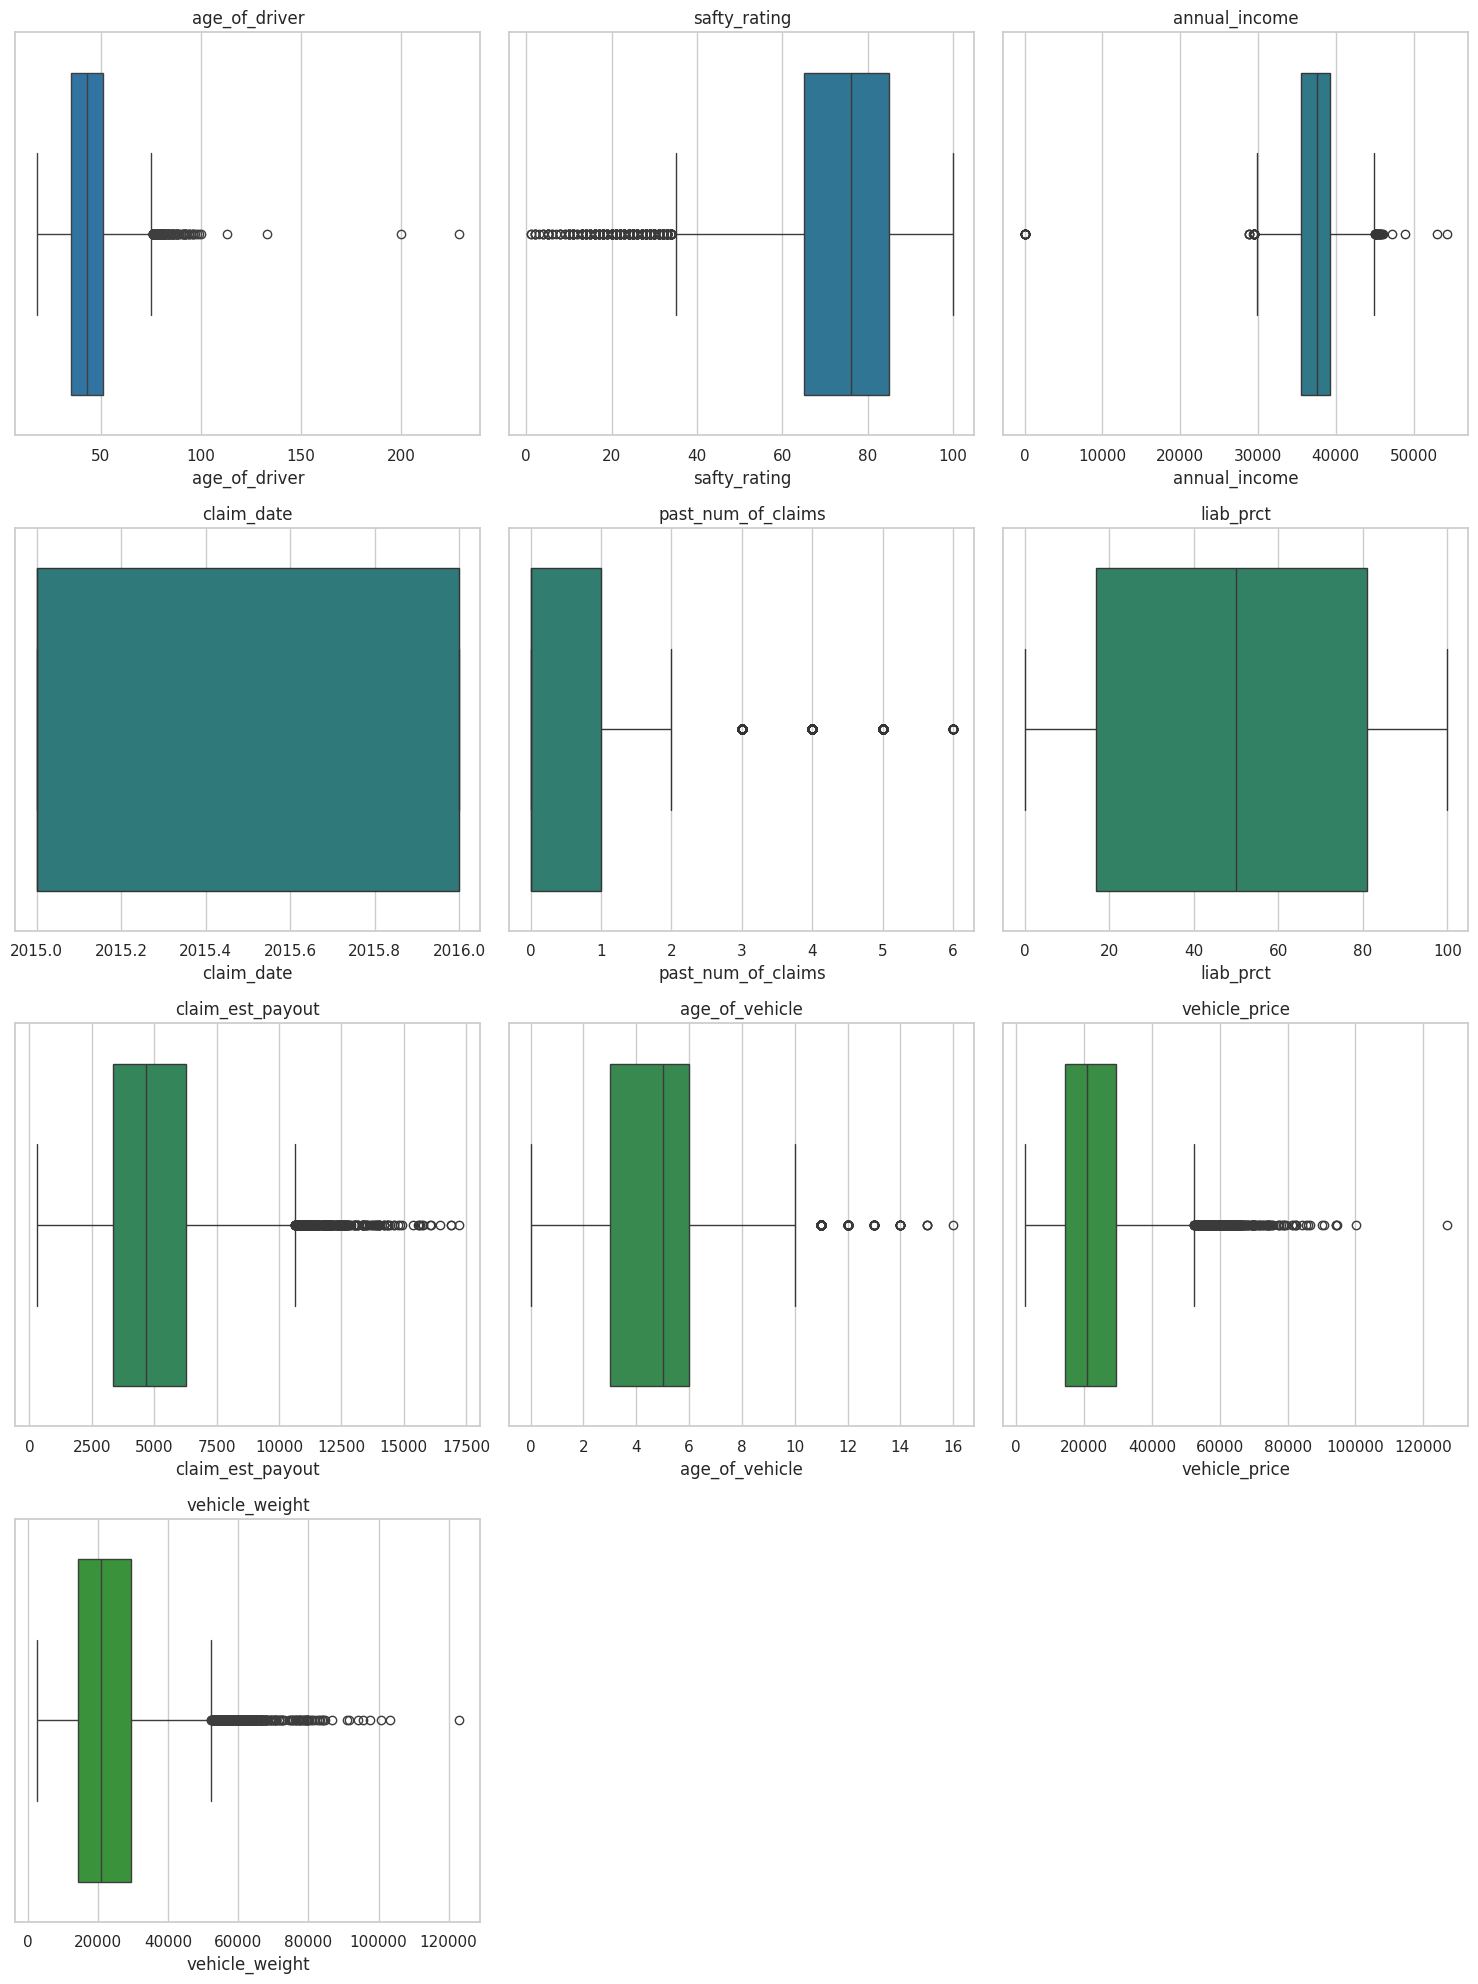

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Create a custom blue-green palette
custom_palette = sns.color_palette("blend:#1f77b4,#2ca02c", n_colors=len(num_vars))

# Create a boxplot for each numerical variable with its corresponding color
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i], color=custom_palette[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


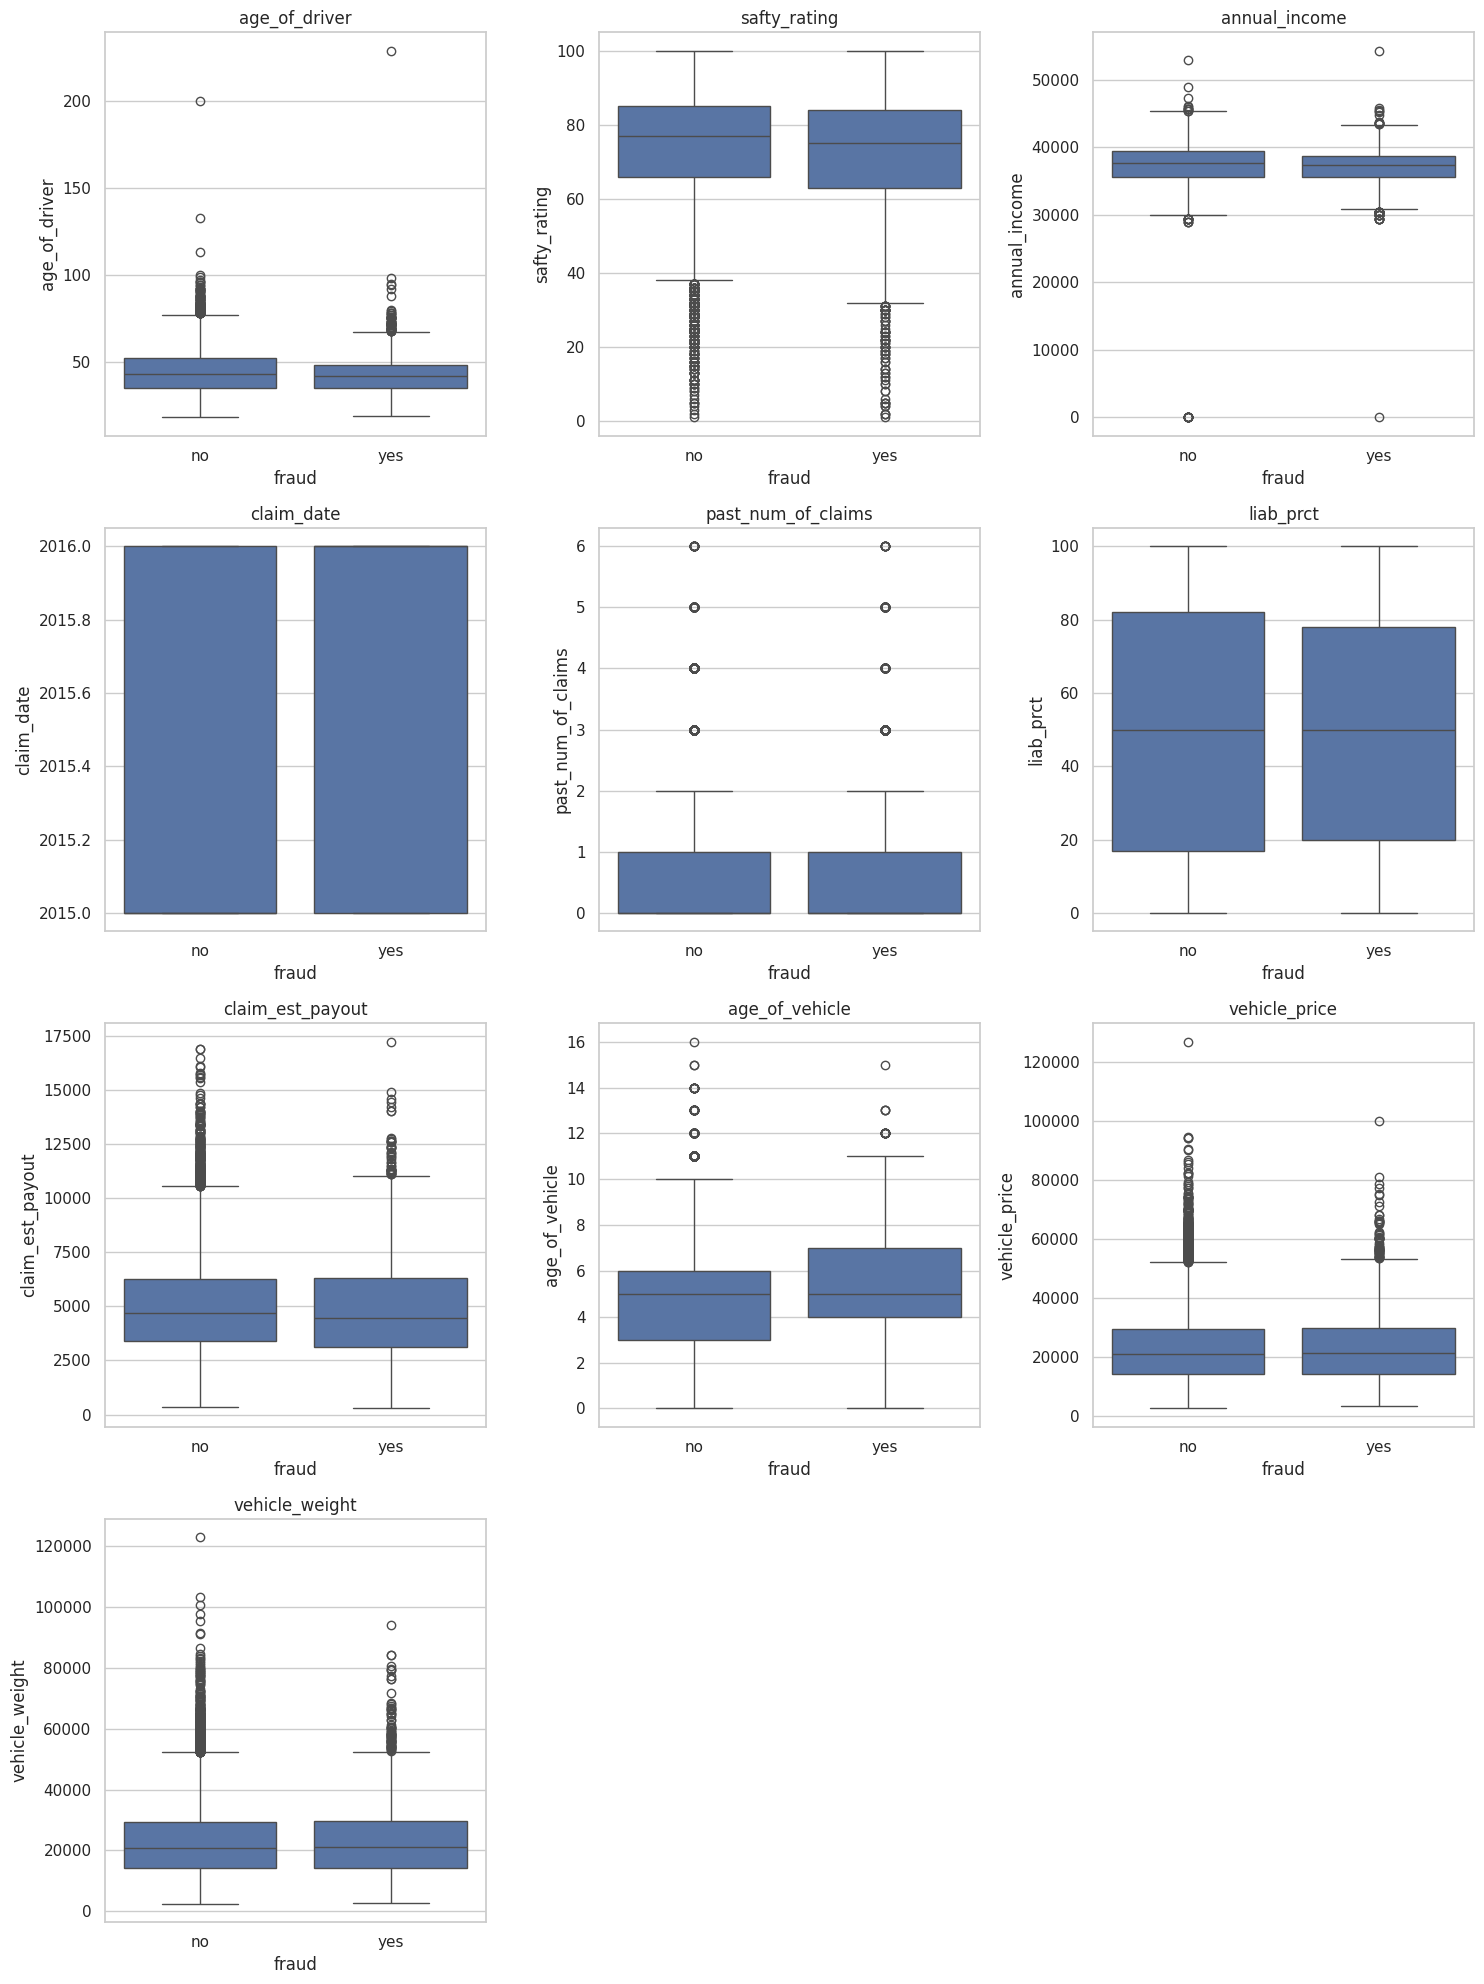

In [64]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='fraud', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

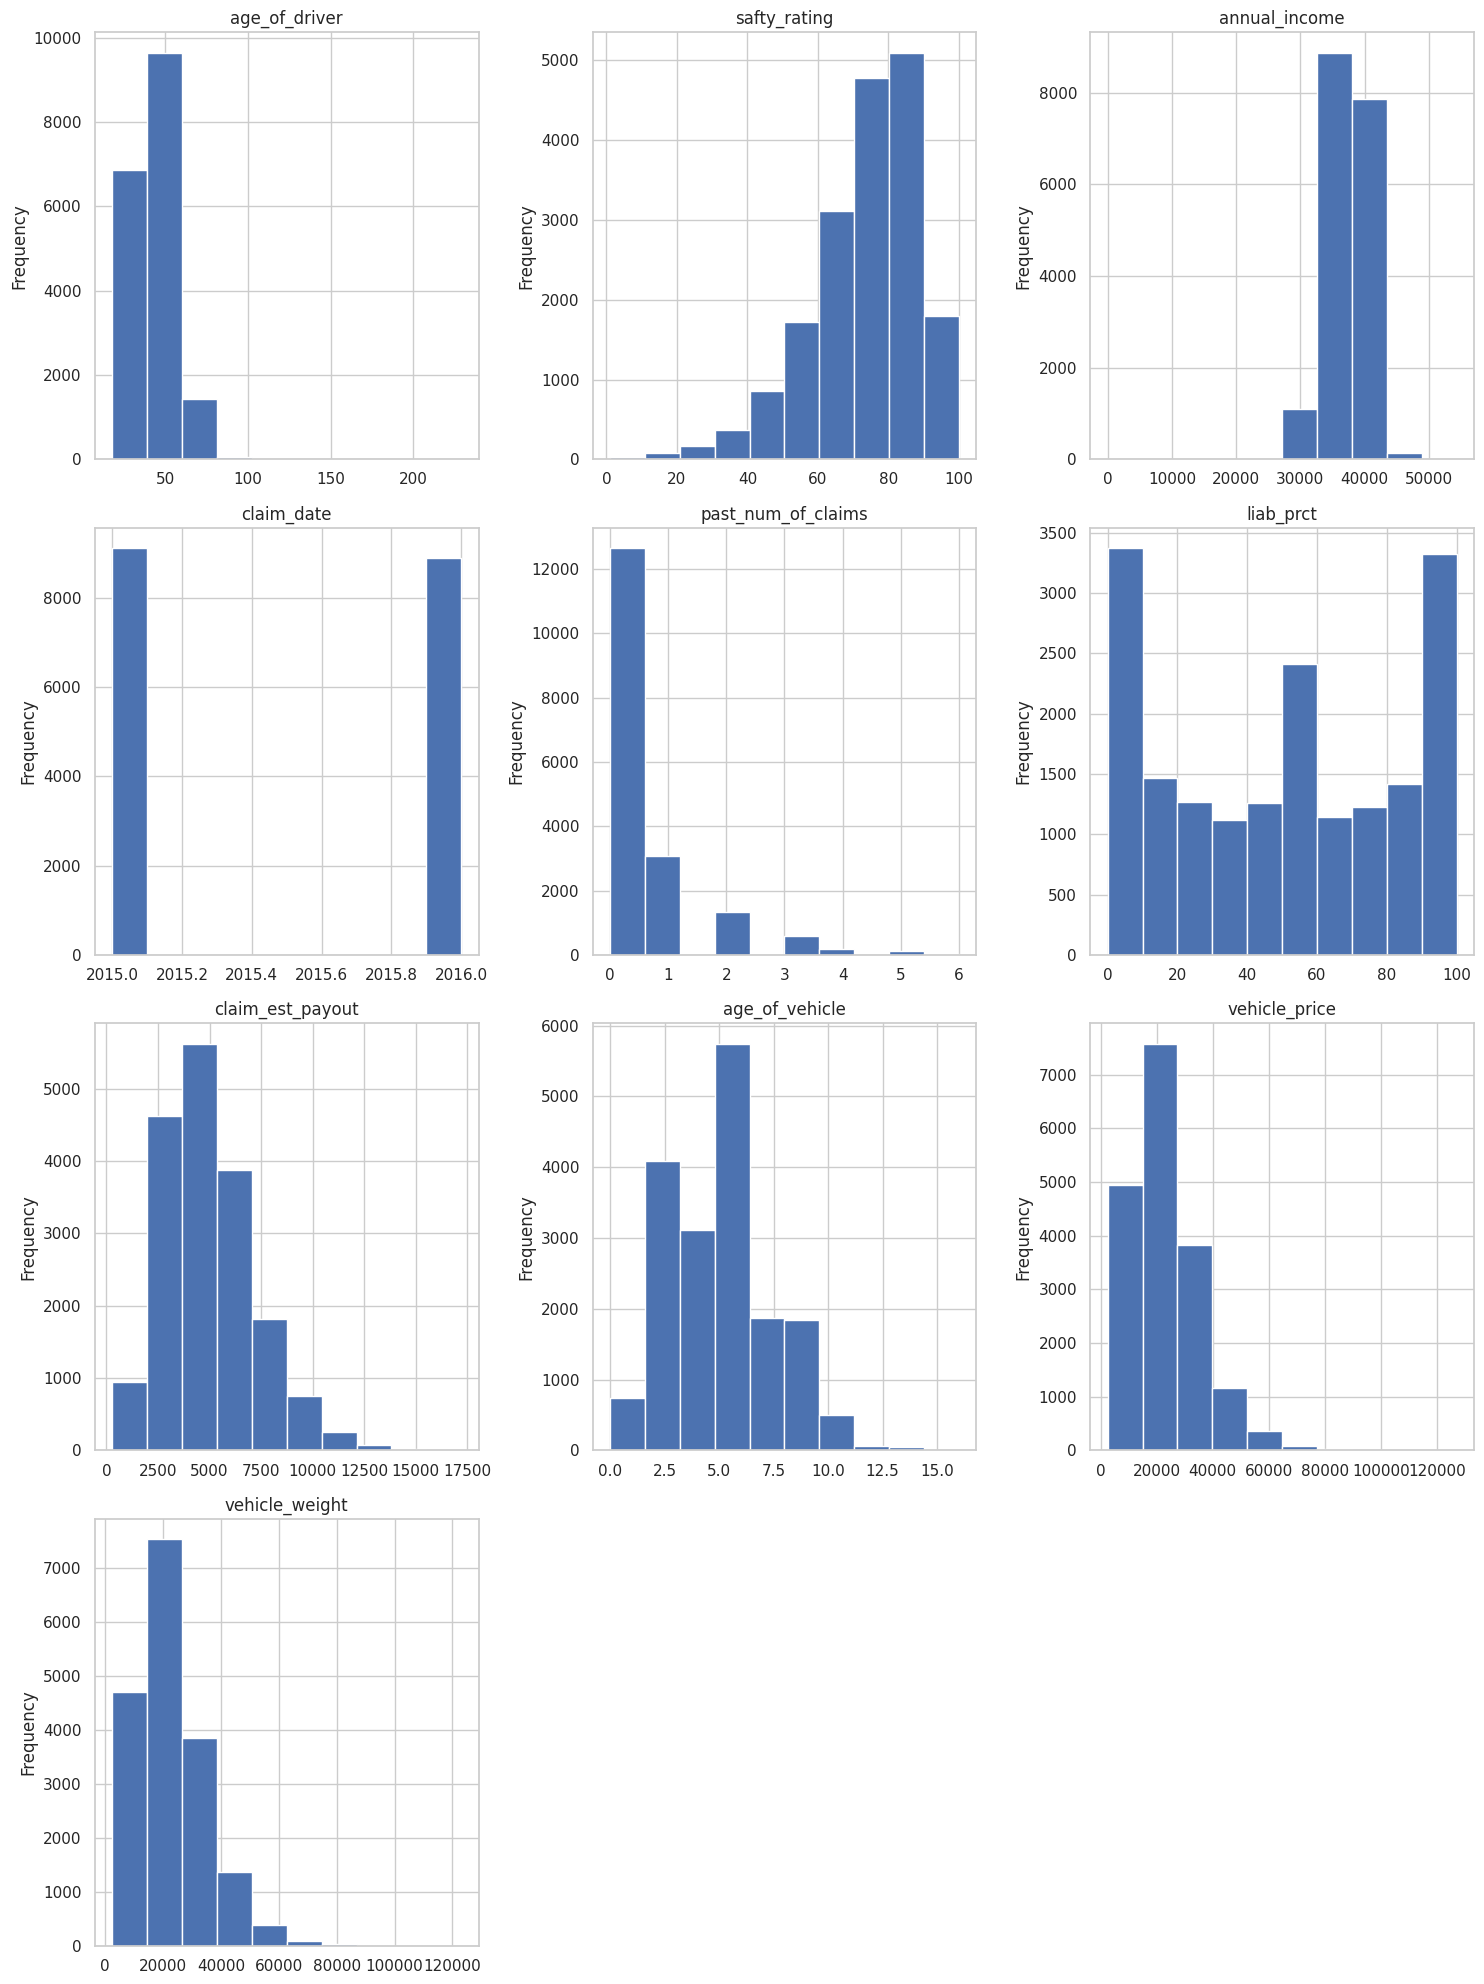

In [65]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

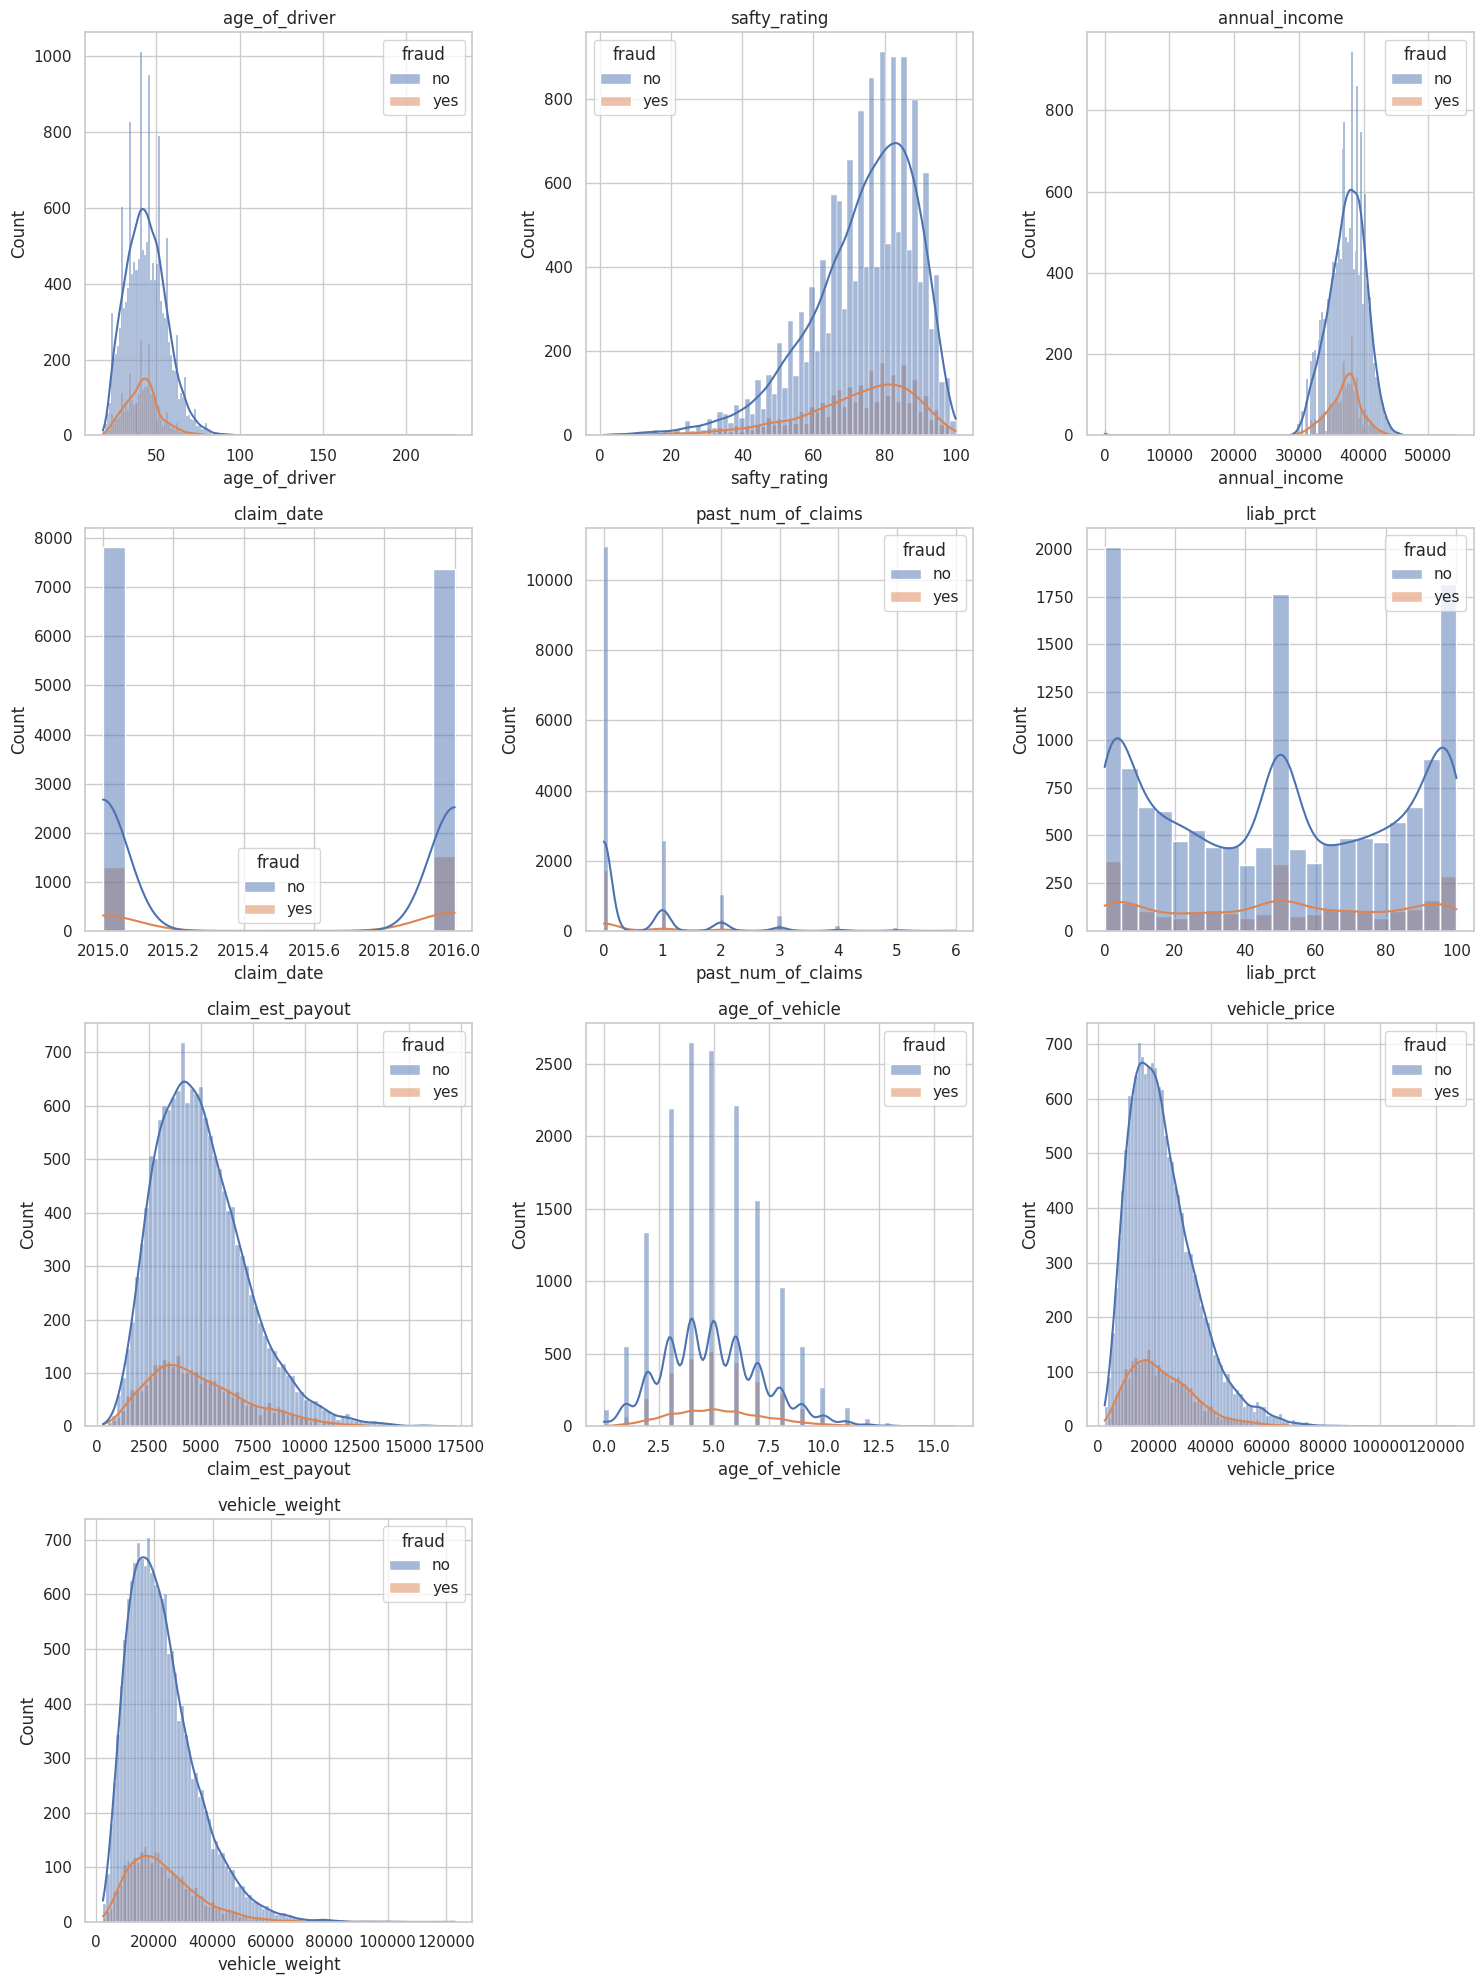

In [66]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='fraud', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

/tmp/ipython-input-67-2072443731.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-67-2072443731.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-67-2072443731.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-67-2072443731.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-67-2072443731.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-67-2072443731.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usi

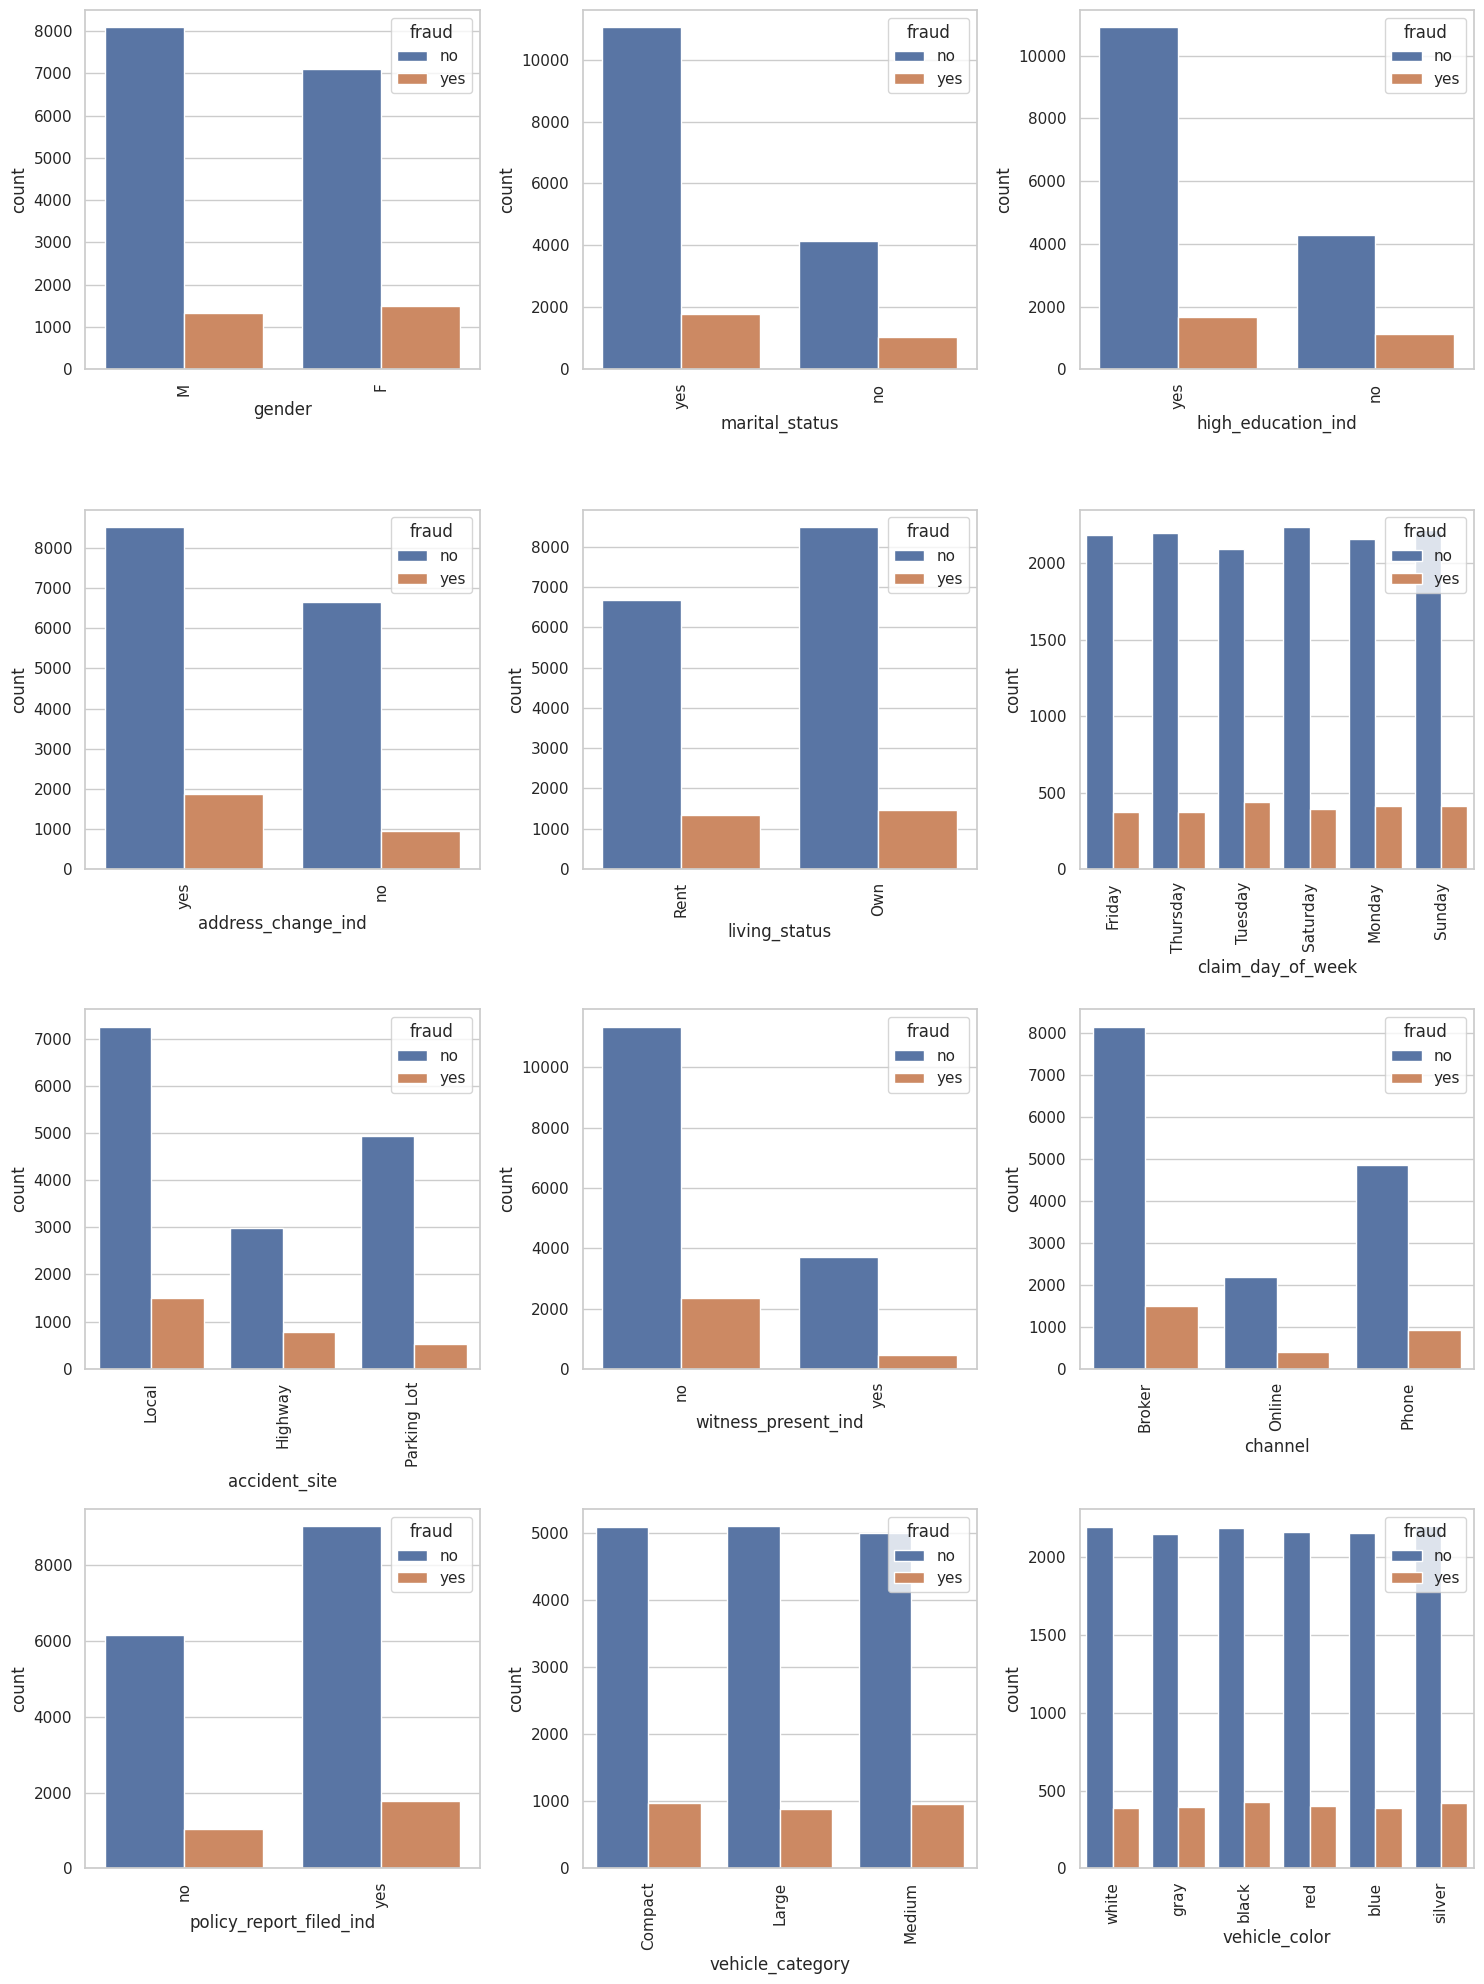

In [67]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'fraud' in cat_vars:
    cat_vars.remove('fraud')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='fraud', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

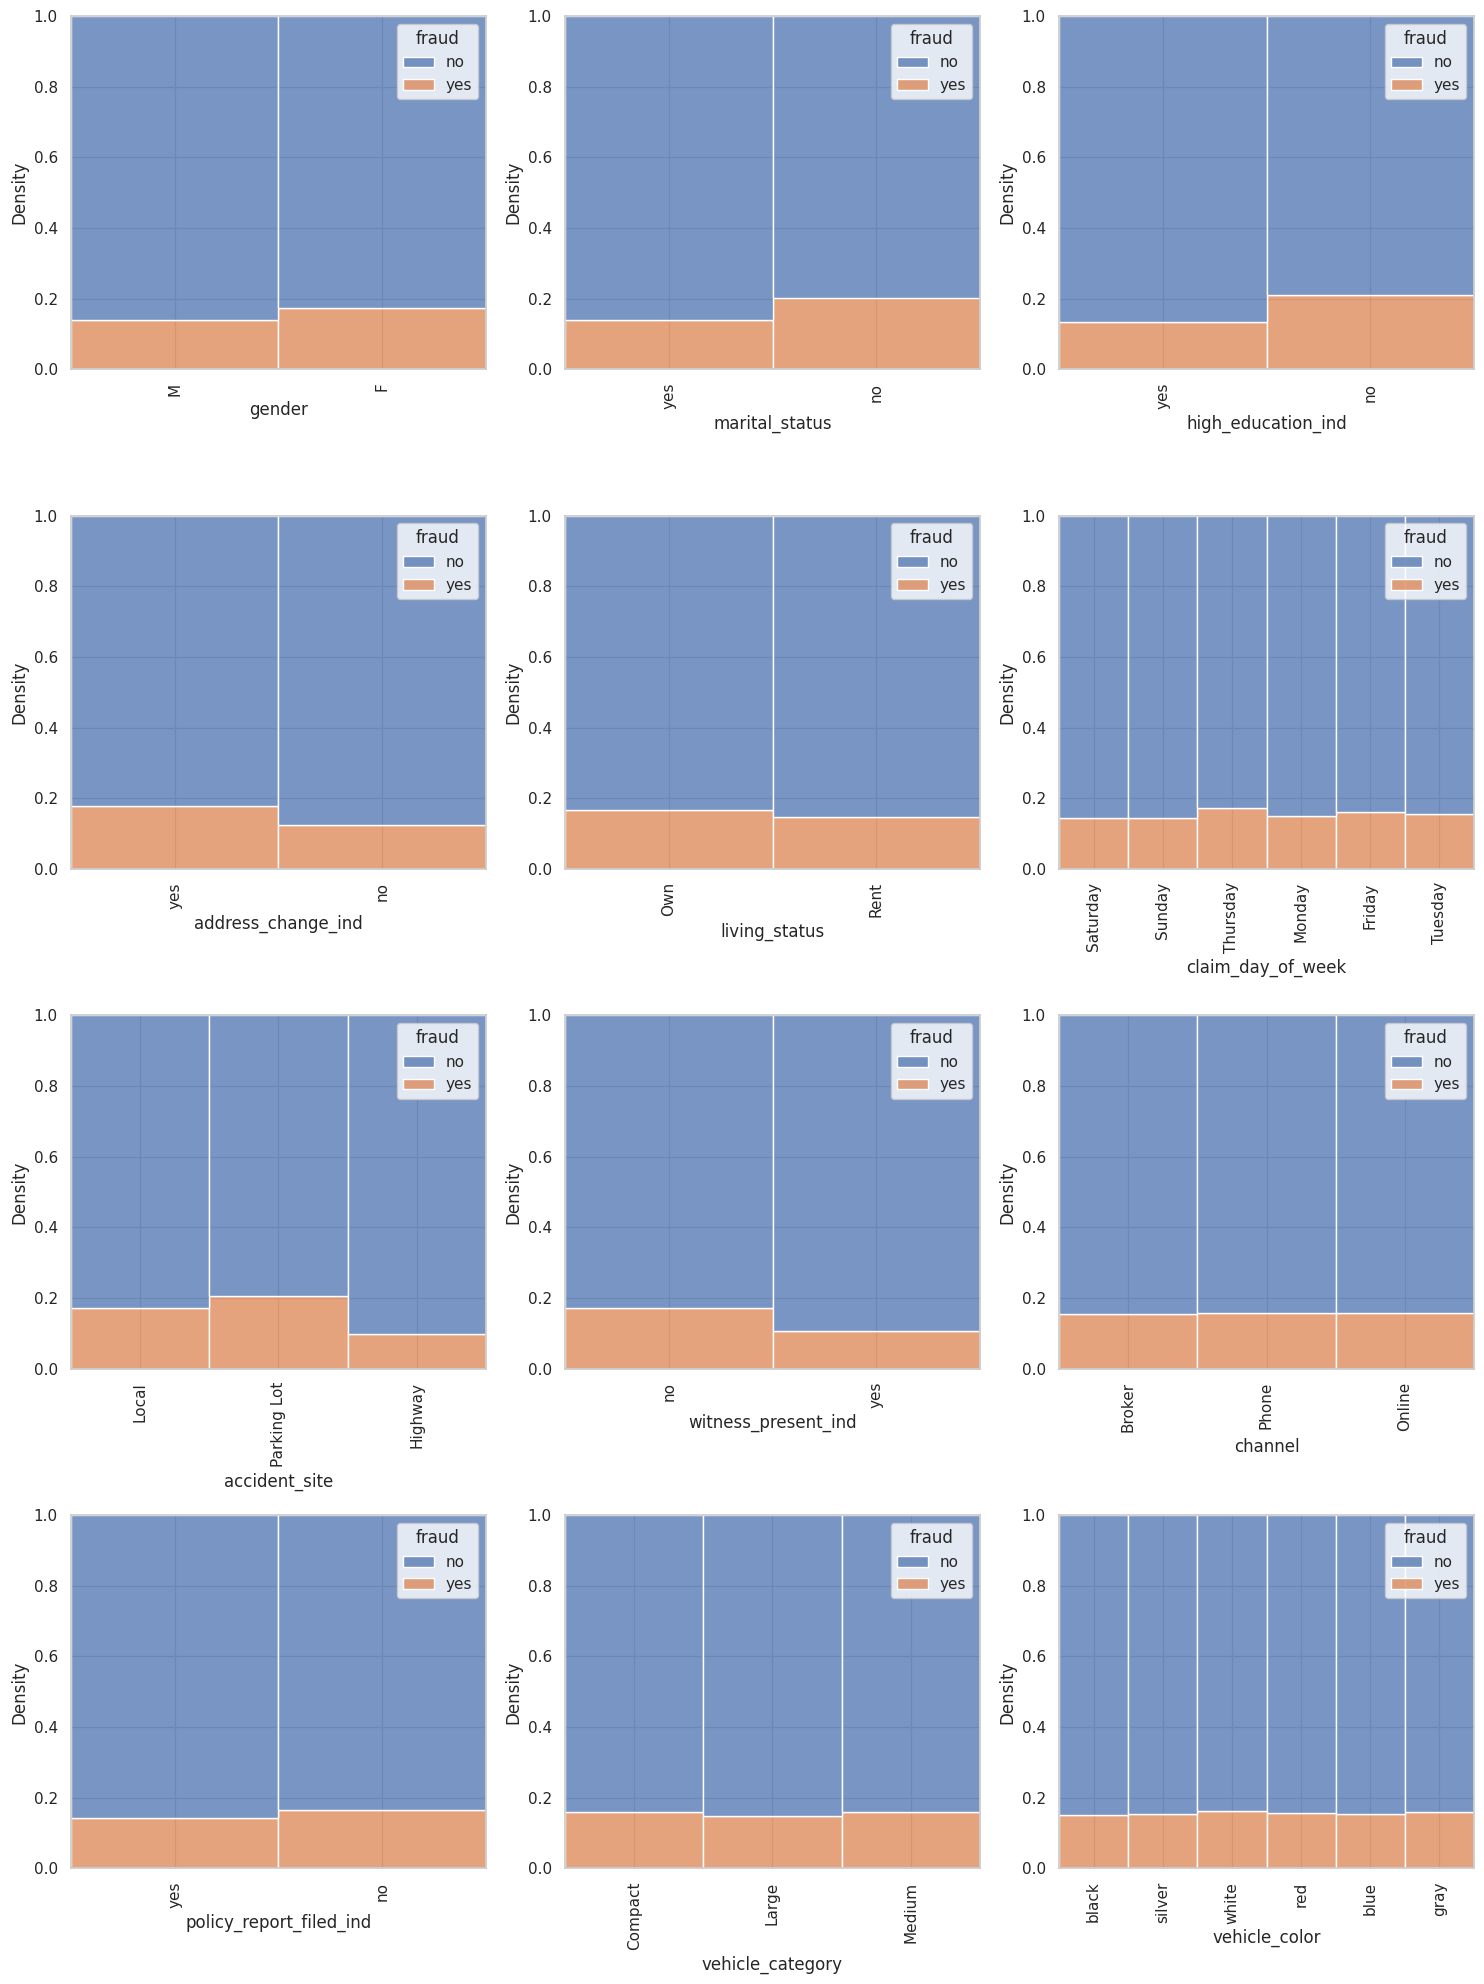

In [68]:
import warnings

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'fraud' in cat_vars:
    cat_vars.remove('fraud')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]

    # Set x-tick positions explicitly
    tick_positions = range(len(top_values))
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(top_values, rotation=90)  # Set x-tick labels

    sns.histplot(x=var, hue='fraud', data=filtered_df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [69]:
# Check the amount of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

,0
witness_present_ind,0.733415
claim_est_payout,0.094455
age_of_vehicle,0.044449
marital_status,0.027781


In [70]:
# Drop all of the nulll value because the amount of null value is very small
df.dropna(inplace=True)
df.shape

(17836, 23)

In [71]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

gender: ['M' 'F']
marital_status: ['yes' 'no']
high_education_ind: ['yes' 'no']
address_change_ind: ['yes' 'no']
living_status: ['Rent' 'Own']
claim_day_of_week: ['Friday' 'Thursday' 'Tuesday' 'Wednesday' 'Saturday' 'Monday' 'Sunday']
accident_site: ['Local' 'Highway' 'Parking Lot']
witness_present_ind: ['no' 'yes']
channel: ['Broker' 'Online' 'Phone']
policy_report_filed_ind: ['no' 'yes']
vehicle_category: ['Compact' 'Large' 'Medium']
vehicle_color: ['white' 'other' 'gray' 'black' 'red' 'blue' 'silver']
fraud: ['no' 'yes']


In [72]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

gender: [1 0]
marital_status: [1 0]
high_education_ind: [1 0]
address_change_ind: [1 0]
living_status: [1 0]
claim_day_of_week: [0 4 5 6 2 1 3]
accident_site: [1 0 2]
witness_present_ind: [0 1]
channel: [0 1 2]
policy_report_filed_ind: [0 1]
vehicle_category: [0 1 2]
vehicle_color: [6 3 2 0 4 1 5]
fraud: [0 1]


# **Correlation Analysis**

<Axes: >

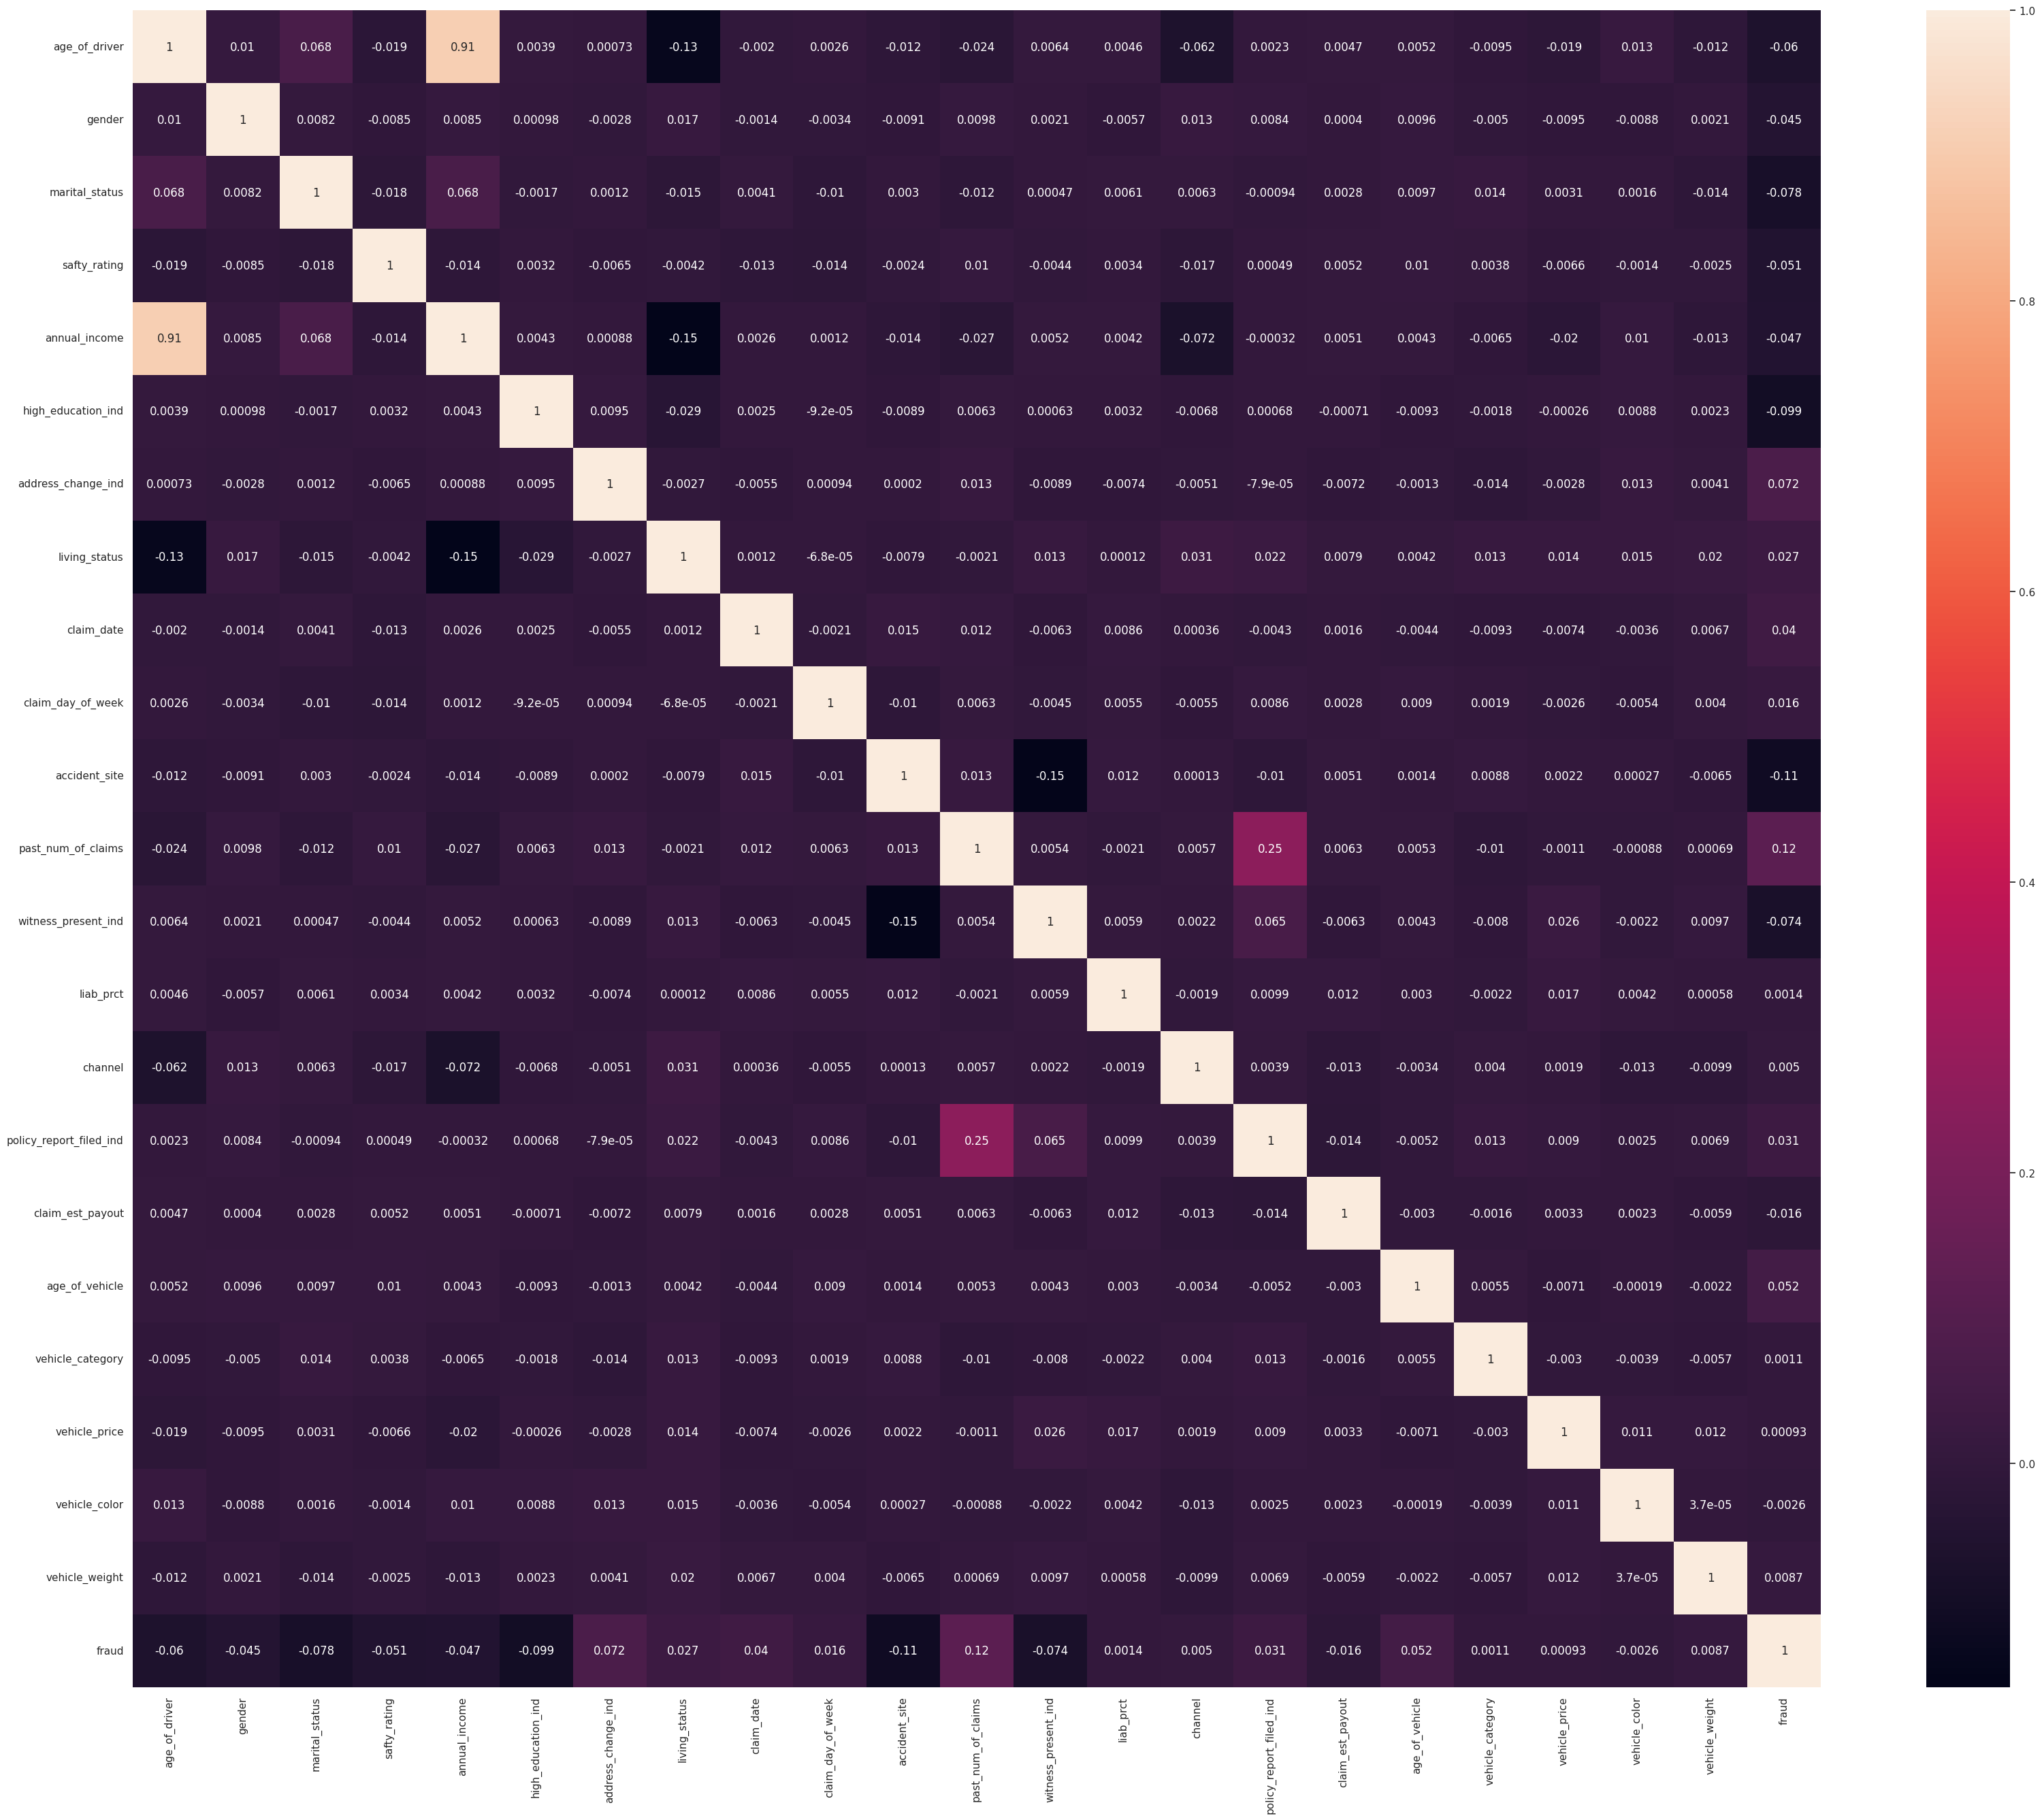

In [73]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

Key Insights From This Heatmap
**Strong Correlations**
fraud is positively correlated with:

age_of_driver (≈ 0.09)

policy_report_filed_Yes (≈ 0.11)

witness_present_Yes (≈ 0.14)

While these are not very strong (closer to 0.1), in fraud detection tasks, even small correlations can be meaningful.

annual_income and age_of_driver have a moderately positive correlation (≈ 0.31). This makes intuitive sense—older drivers may have higher income levels.

claim_day_of_week and claim_date seem mostly uncorrelated.

**Negative Correlations**
witness_present_Yes and claim_day_of_week (≈ -0.14):
Possibly indicating witnesses are less likely to be present on certain days.

fraud is slightly negatively correlated with:

safety_rating (≈ -0.07): suggesting drivers with lower safety ratings might be more involved in fraud.

vehicle_price (≈ -0.06): could suggest high-value vehicles are less associated with fraud in this data.

Multicollinearity Risk: There's not much high correlation among predictors, which is good for some models (especially linear ones).

Feature Relationships: You can identify which variables might be more useful predictors for the target (fraud).

Data Distribution Clues: Small correlations (e.g., < 0.2) hint that no single variable dominates, which means machine learning models will need combinations of features to predict well.

# **Train Test Split**

In [74]:
X = df.drop('fraud', axis=1)
y = df['fraud']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [75]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['age_of_driver', 'safty_rating', 'annual_income',
                    'claim_est_payout', 'age_of_vehicle', 'vehicle_price',
                    'vehicle_weight']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [76]:
# Convert categorical variables in X_train and X_test to numeric
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns (in case train and test don't have same dummy columns)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [78]:
# Convert categorical variables to dummy/indicator variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure train and test have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [79]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(
    random_state=0,
    max_depth=8,
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight='balanced'
)

dtree.fit(X_train_encoded, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=0)

In [80]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

y_pred = dtree.predict(X_test_encoded)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred) * 100, 2), "%")



Accuracy Score : 63.87 %


In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6387331838565022
Precision Score :  0.6387331838565022
Recall Score :  0.6387331838565022
Jaccard Score :  0.46921968293185096
Log Loss :  13.021375902066145


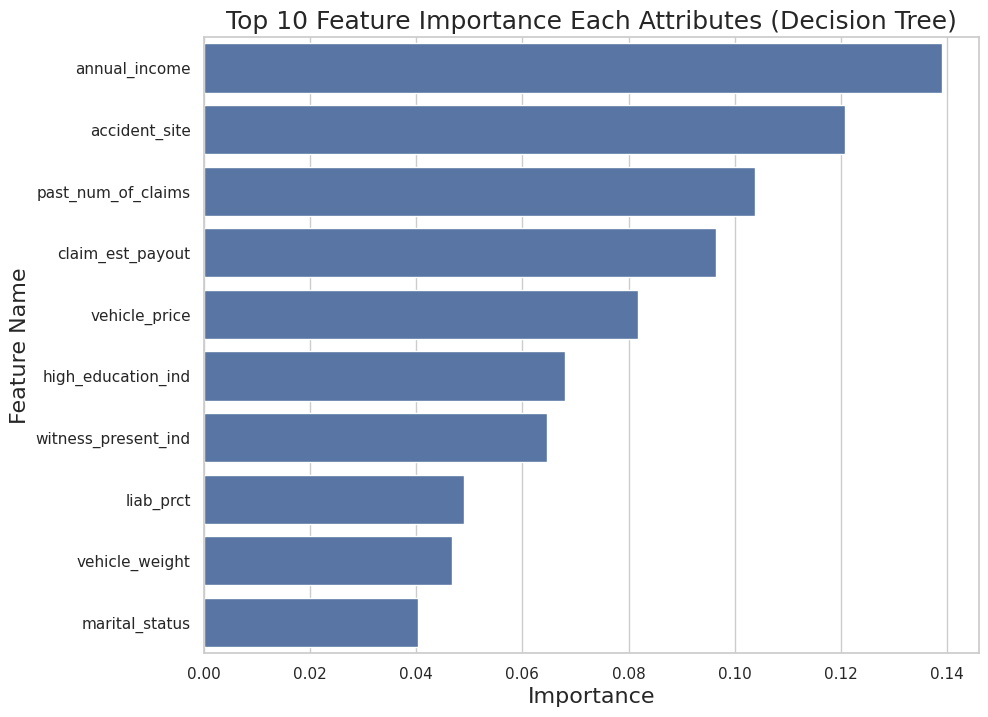

In [82]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [83]:
pip install shap --upgrade


/tmp/ipython-input-84-2211784337.py:4: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.

/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.

/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



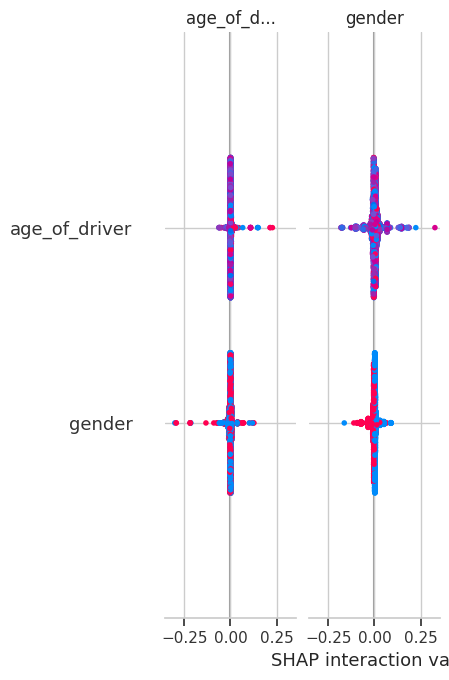

In [84]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

PermutationExplainer explainer: 3569it [02:26, 22.60it/s]                          
/tmp/ipython-input-85-2662662791.py:11: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



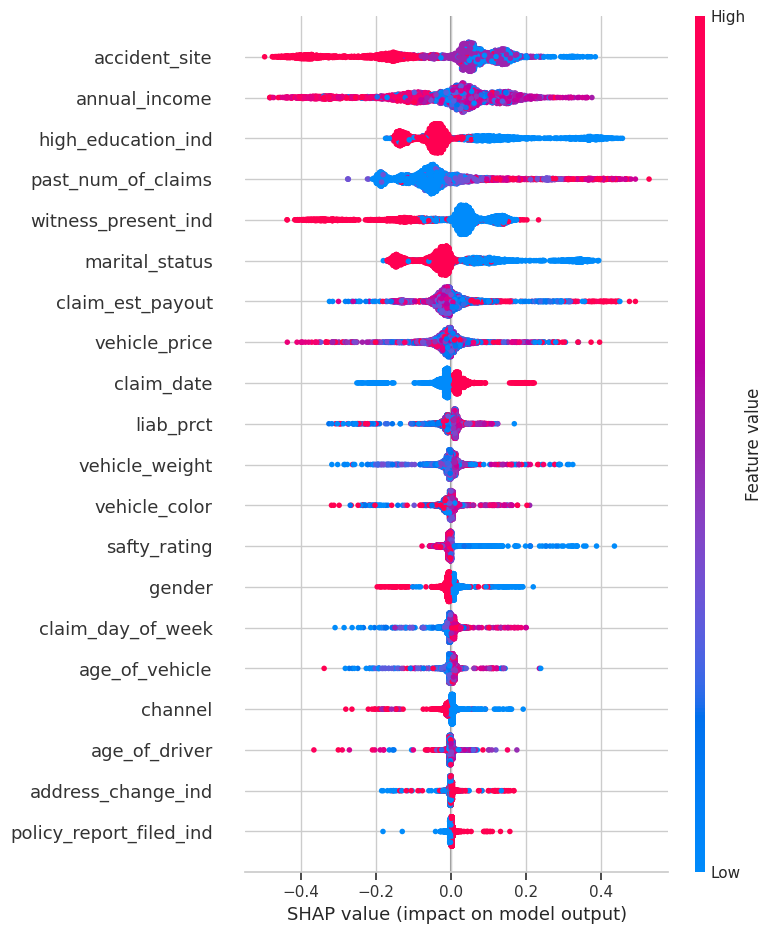

In [85]:
import shap

# Ensure X_test is a DataFrame and matches training features
X_test_shap = X_test_encoded  # Use encoded version that was used during training

# Use the unified Explainer interface
explainer = shap.Explainer(dtree.predict, X_test_shap)
shap_values = explainer(X_test_shap)

# Summary plot of SHAP values
shap.summary_plot(shap_values.values, X_test_shap)


Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6387331838565022')

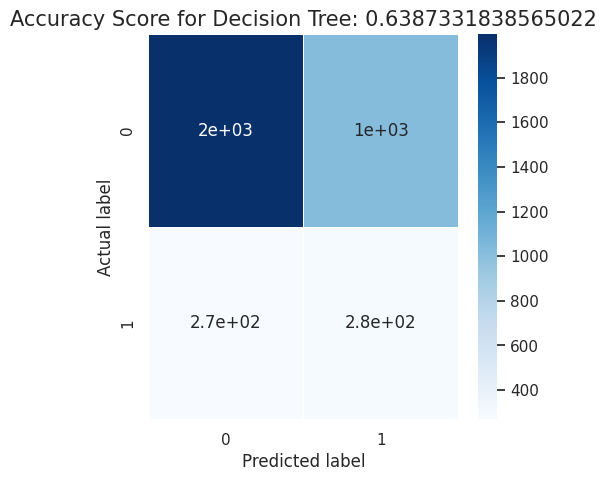

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

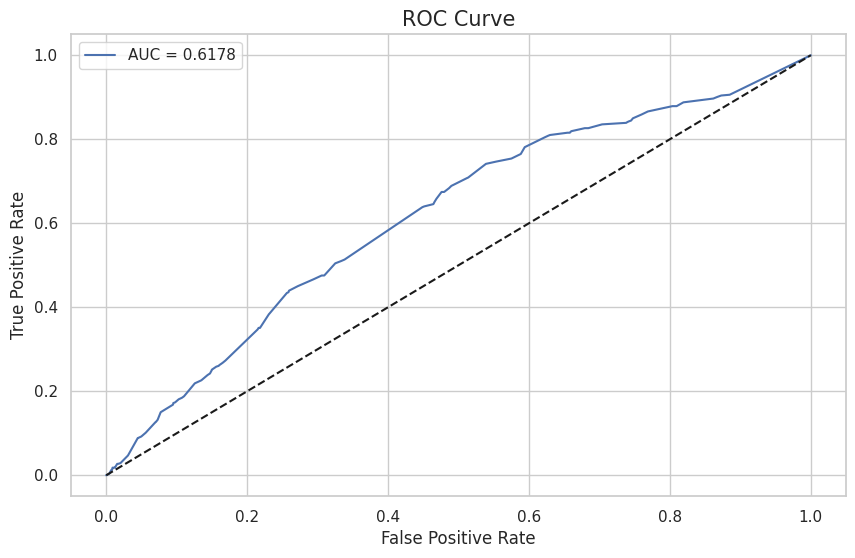

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
# import shap
# explainer = shap.TreeExplainer(rfc)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test)

In [ ]:
# # compute SHAP values
# explainer = shap.TreeExplainer(rfc)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
# Ensure datetime format
df['claim_date'] = pd.to_datetime(df['claim_date'])

# Extract day of week
df['claim_day_of_week'] = df['claim_date'].dt.day_name()

# Plot fraud counts by day of week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='claim_day_of_week', hue='fraud', palette='Set2',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fraudulent Claims by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Claims')
plt.legend(title='Fraud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fraud', y='claim_est_payout', hue='vehicle_price', palette='coolwarm')
plt.title('Estimated Claim Payout by Fraud Status and Vehicle Price')
plt.xlabel('Fraud')
plt.ylabel('Estimated Payout')
plt.legend(title='Vehicle Price')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='past_num_of_claims', y='claim_est_payout', hue='fraud', alpha=0.7)
plt.title('Past Claims vs Estimated Payout Colored by Fraud')
plt.xlabel('Past Number of Claims')
plt.ylabel('Estimated Payout')
plt.legend(title='Fraud')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Make sure 'claim_date' is in datetime format
df['claim_date'] = pd.to_datetime(df['claim_date'])

# Group by month and fraud status
fraud_trend = df.groupby([pd.Grouper(key='claim_date', freq='ME'), 'fraud']) \
                .agg(fraud_count=('fraud', 'size'), avg_income=('annual_income', 'mean')) \
                .reset_index()

# Pivot for plotting
fraud_pivot = fraud_trend.pivot(index='claim_date', columns='fraud', values='fraud_count').fillna(0)
income_pivot = fraud_trend.pivot(index='claim_date', columns='fraud', values='avg_income').fillna(0)

# Plot
fig = go.Figure()

# Fraud and non-fraud claim counts
fig.add_trace(go.Scatter(x=fraud_pivot.index, y=fraud_pivot.get(1, []),
                         mode='lines+markers', name='Fraudulent Claims', line=dict(color='red')))

fig.add_trace(go.Scatter(x=fraud_pivot.index, y=fraud_pivot.get(0, []),
                         mode='lines+markers', name='Legit Claims', line=dict(color='green')))

# Average income trend
fig.add_trace(go.Scatter(x=income_pivot.index, y=income_pivot.get(1, []),
                         mode='lines', name='Avg Income (Fraud)', line=dict(dash='dash', color='red')))

fig.add_trace(go.Scatter(x=income_pivot.index, y=income_pivot.get(0, []),
                         mode='lines', name='Avg Income (Non-Fraud)', line=dict(dash='dash', color='green')))

# Layout
fig.update_layout(
    title='Monthly Fraud vs Non-Fraud Claims with Average Income Trends',
    xaxis_title='Date',
    yaxis_title='Count / Avg Income',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()